# FYP Teh Chen Ming

# Import Libraries

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


# Load Dataset

In [252]:
df = pd.read_csv('./solar_weather.csv')

In [253]:
df.head()

Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0  2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1  2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2  2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3  2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4  2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0                     0.0             4     0      1  
1                     0.0             4     0      1  
2                     0.0             4     0      1  
3                     0.0             4     0      1  
4                     0.0             4     1      1

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

# Description

In [255]:
print(df.describe())

       Energy delta[Wh]            GHI           temp       pressure  \
count     196776.000000  196776.000000  196776.000000  196776.000000   
mean         573.008228      32.596538       9.790521    1015.292780   
std         1044.824047      52.172018       7.995428       9.585773   
min            0.000000       0.000000     -16.600000     977.000000   
25%            0.000000       0.000000       3.600000    1010.000000   
50%            0.000000       1.600000       9.300000    1016.000000   
75%          577.000000      46.800000      15.700000    1021.000000   
max         5020.000000     229.200000      35.800000    1047.000000   

            humidity     wind_speed        rain_1h        snow_1h  \
count  196776.000000  196776.000000  196776.000000  196776.000000   
mean       79.810566       3.937746       0.066035       0.007148   
std        15.604459       1.821694       0.278913       0.069710   
min        22.000000       0.000000       0.000000       0.000000   
25%   

In [256]:
df.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

- Our findings
1) There are **17 Columns** in dataset. Out of which 6 columns are of **float** type, 10 columns are of **integer** type, 1 is of **object** type.
2) There are **196776 Rows** in dataset.
3) As we can see the column **Time** is of object type we need to convert it in **datetime** format. 
4) There will be 0 null entries in our data set as our columns include **non-null** condition.


# Feature Selection

### We will clear some columns and calculate ourselve

In [257]:
import pandas as pd

# Select only the specified columns
keep_column = [
    'Time', 
    'Energy delta[Wh]', 
    'GHI', 
    'temp', 
    'pressure', 
    'humidity', 
    'wind_speed', 
    'rain_1h', 
    'snow_1h', 
    'clouds_all'
]

# Create a new DataFrame with only the specified columns
df = df[keep_column]

df.head()


Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0  2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1  2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2  2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3  2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4  2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  
0         4.9      0.0      0.0         100  
1         4.9      0.0      0.0         100  
2         4.9      0.0      0.0         100  
3         4.9      0.0      0.0         100  
4         5.2      0.0      0.0         100

In [258]:
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Verify the changes
print(df.info())  # To check the updated data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              196776 non-null  datetime64[ns]
 1   Energy delta[Wh]  196776 non-null  int64         
 2   GHI               196776 non-null  float64       
 3   temp              196776 non-null  float64       
 4   pressure          196776 non-null  int64         
 5   humidity          196776 non-null  int64         
 6   wind_speed        196776 non-null  float64       
 7   rain_1h           196776 non-null  float64       
 8   snow_1h           196776 non-null  float64       
 9   clouds_all        196776 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 15.0 MB
None


# Initial EDA

### spliting data into normal, day/night, seasonal data to do EDA

In [259]:
# Add the 'isDayTime' column, day is 1 and night is 0
df['isDayTime'] = (df['GHI'] > 0).astype(int)

# Segment data for winter months (December, January, February)
df['Month'] = df['Time'].dt.month
winter_df = df[df['Month'].isin([12, 1, 2])]

# Drop the temporary Month column
winter_df = winter_df.drop(columns=['Month'])



### Now detecting abnormal data, noise and outlier on general column that are not affected by day and night or seasonal factor

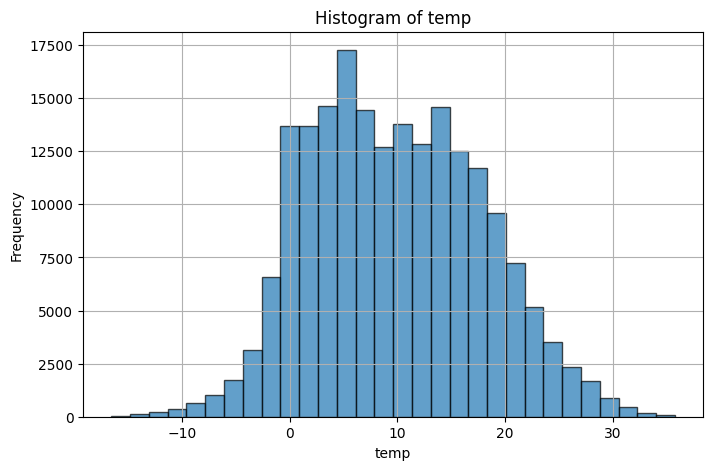

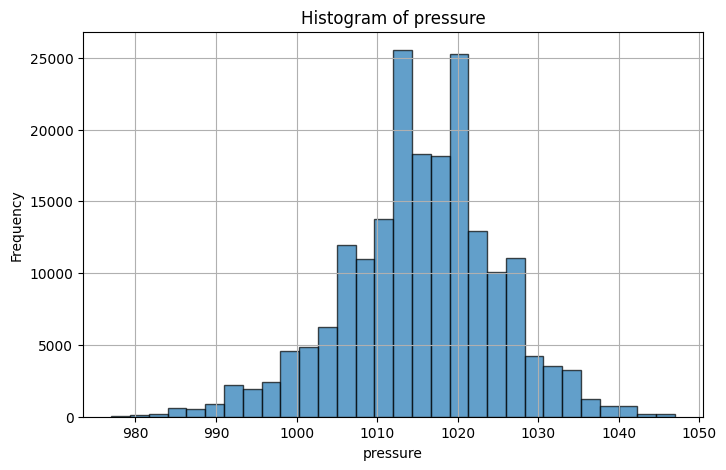

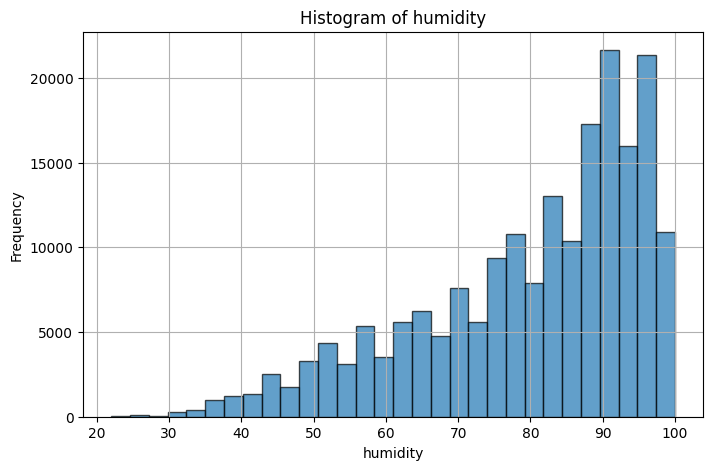

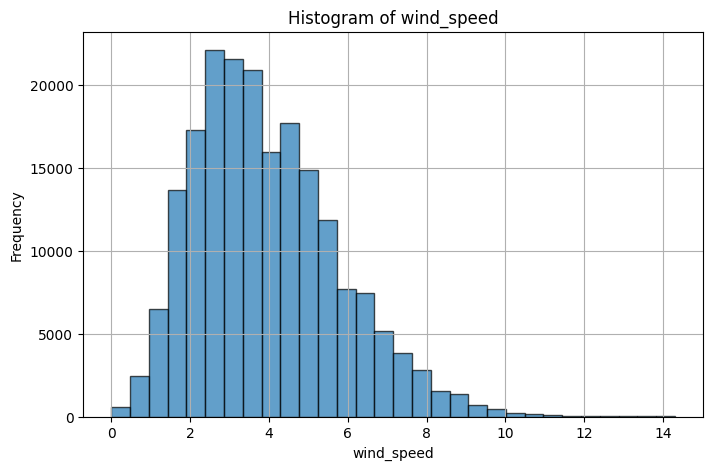

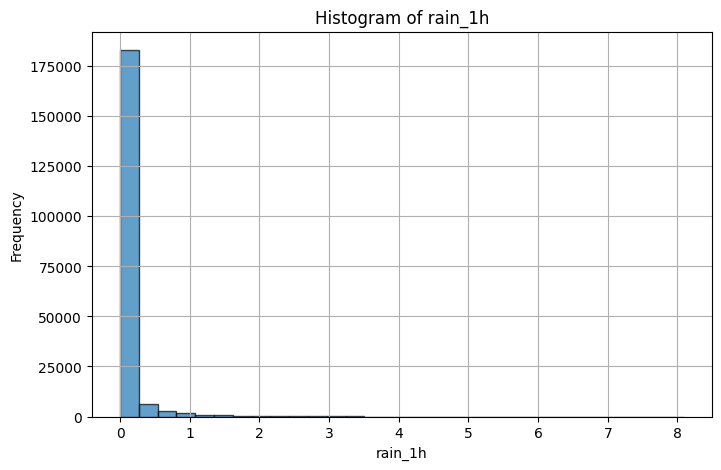

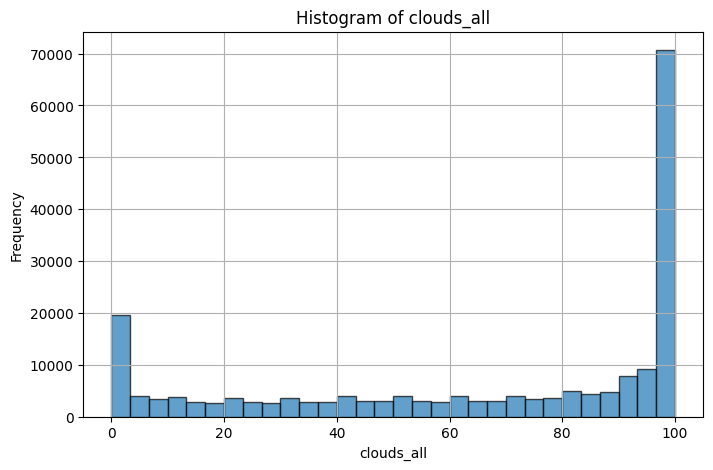

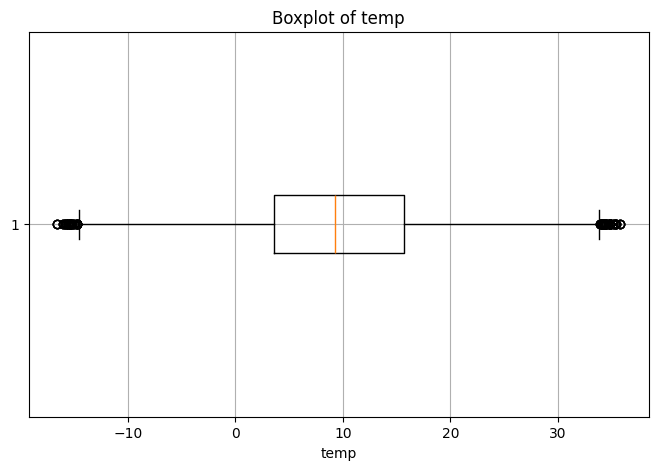

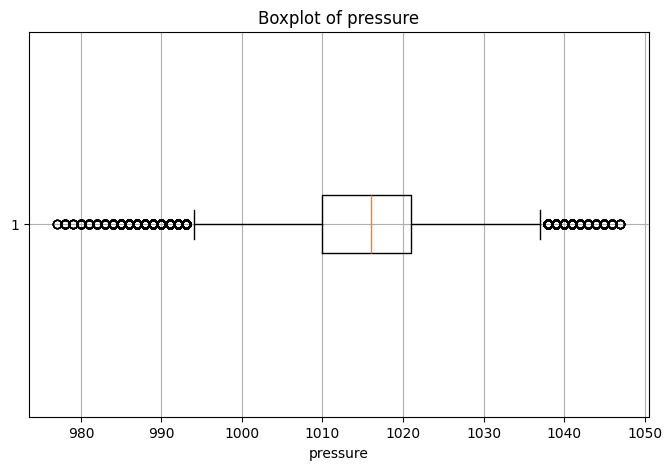

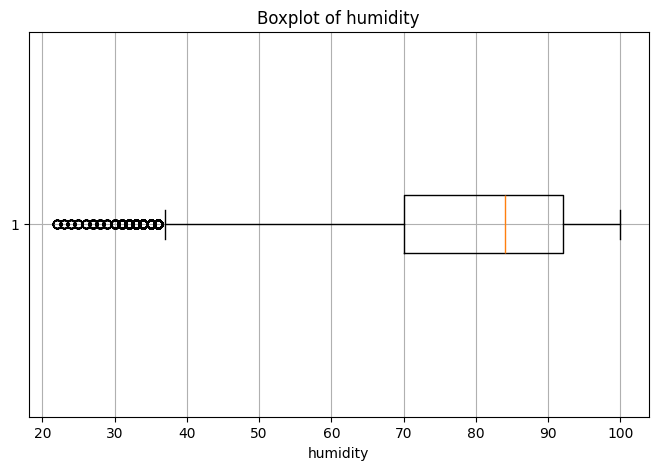

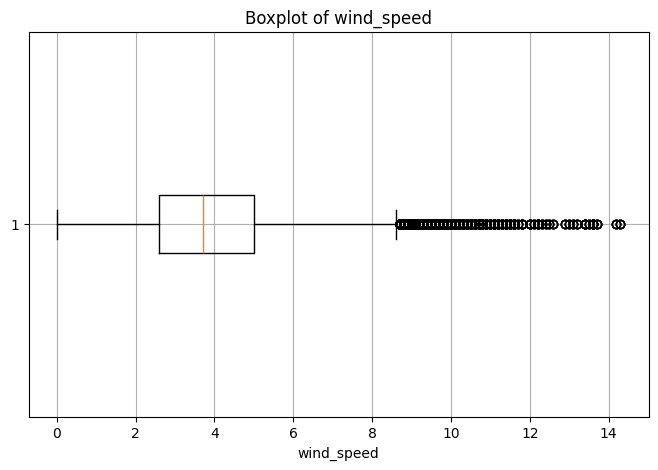

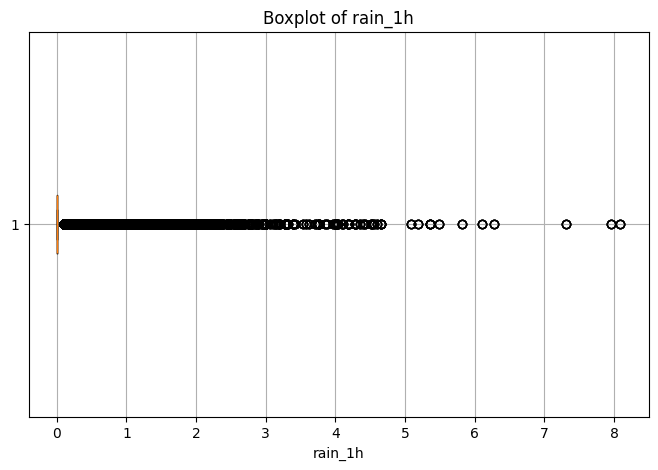

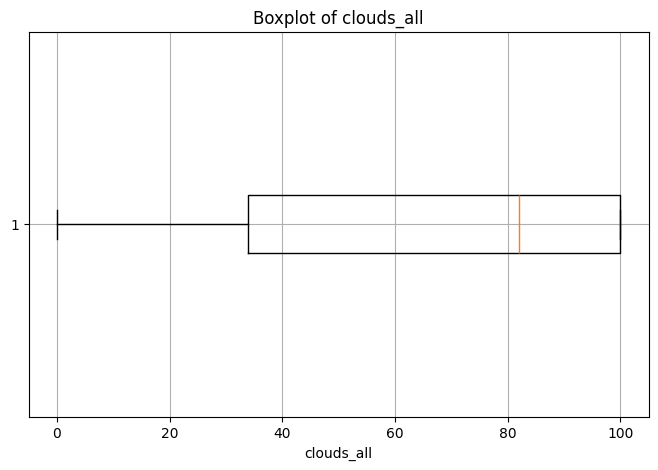

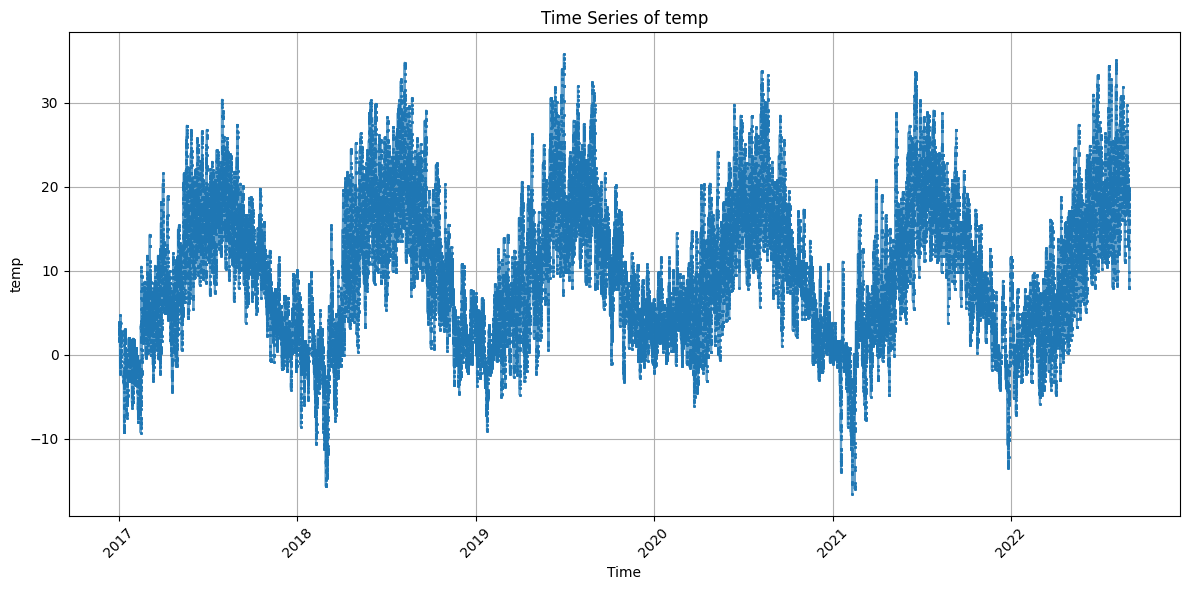

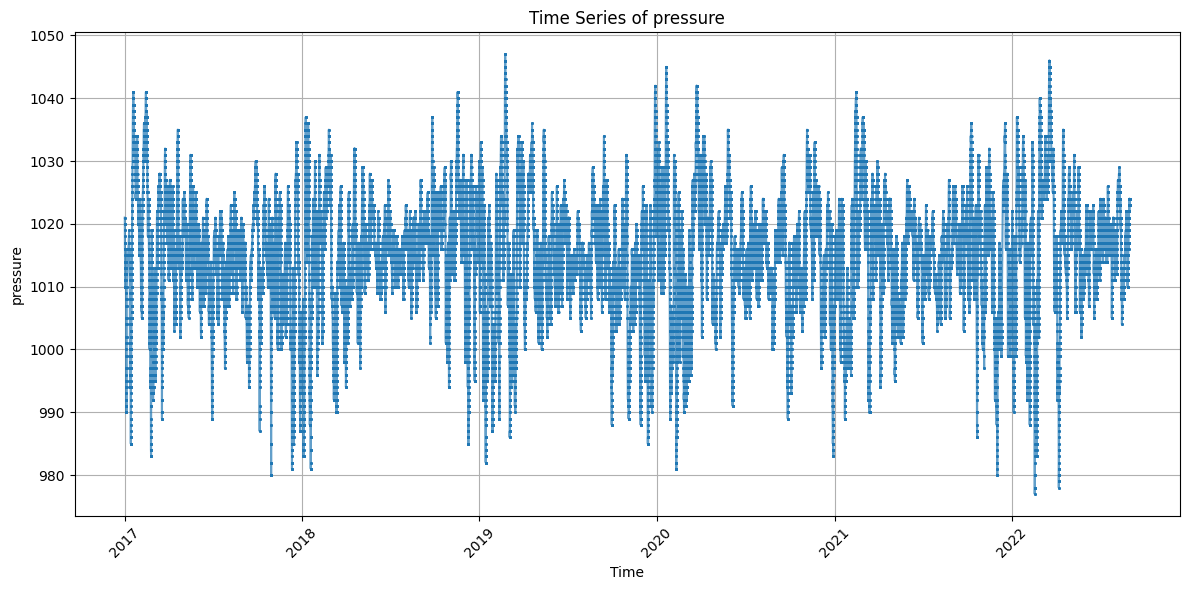

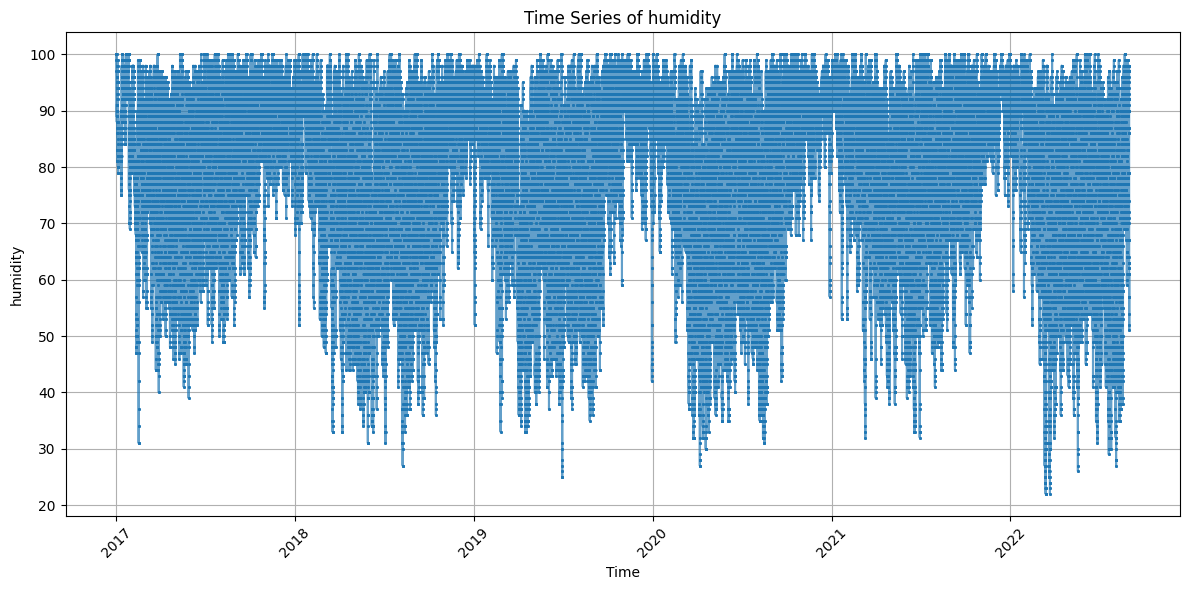

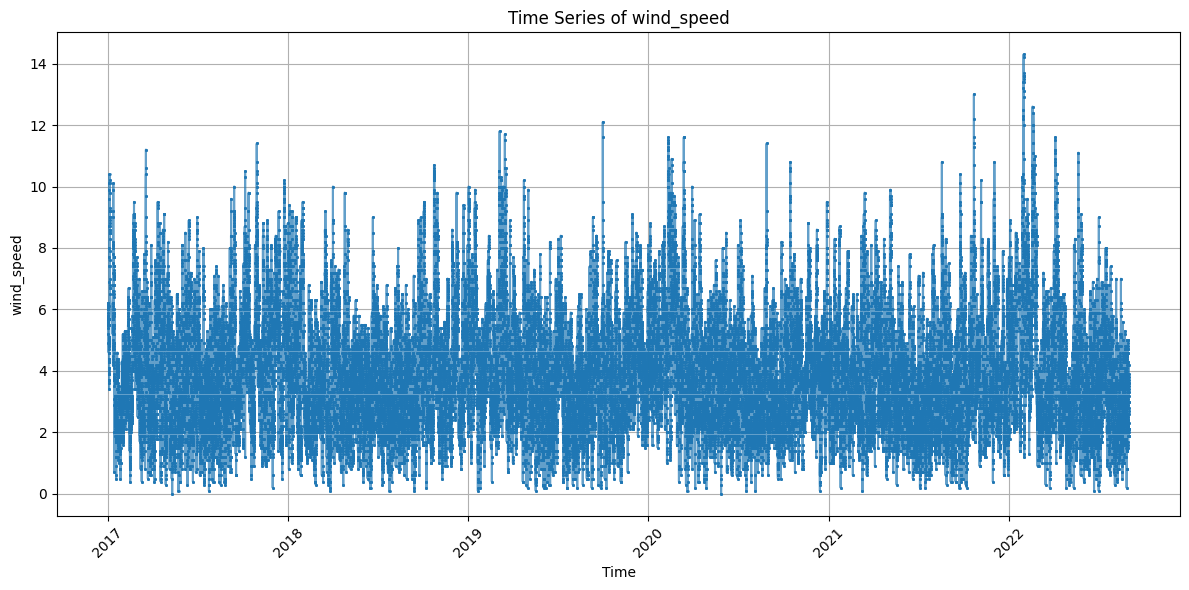

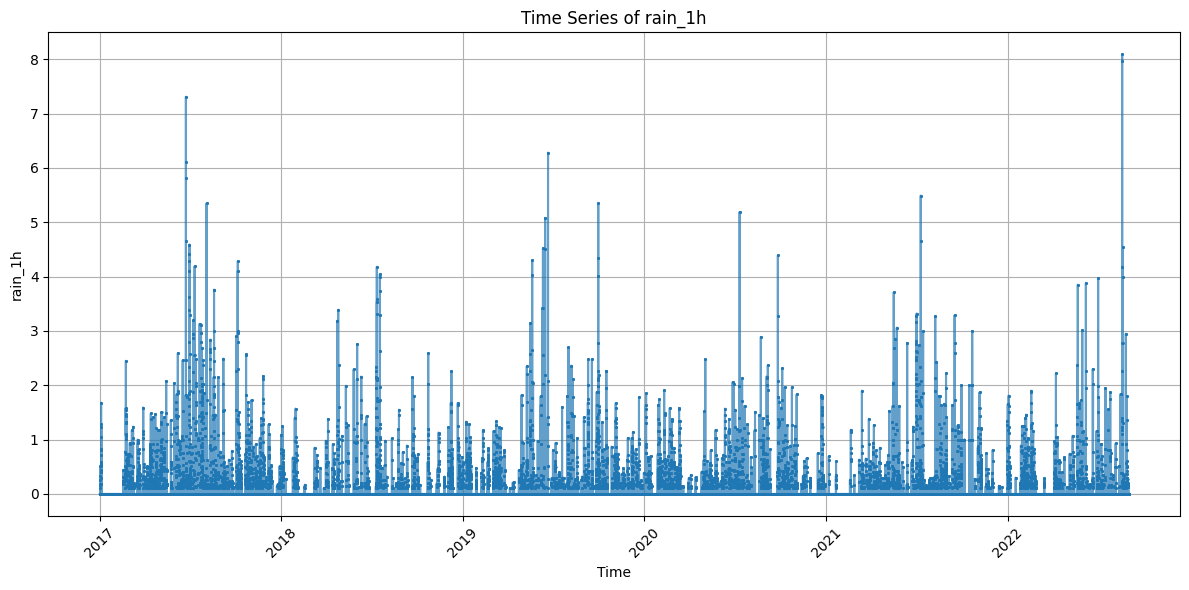

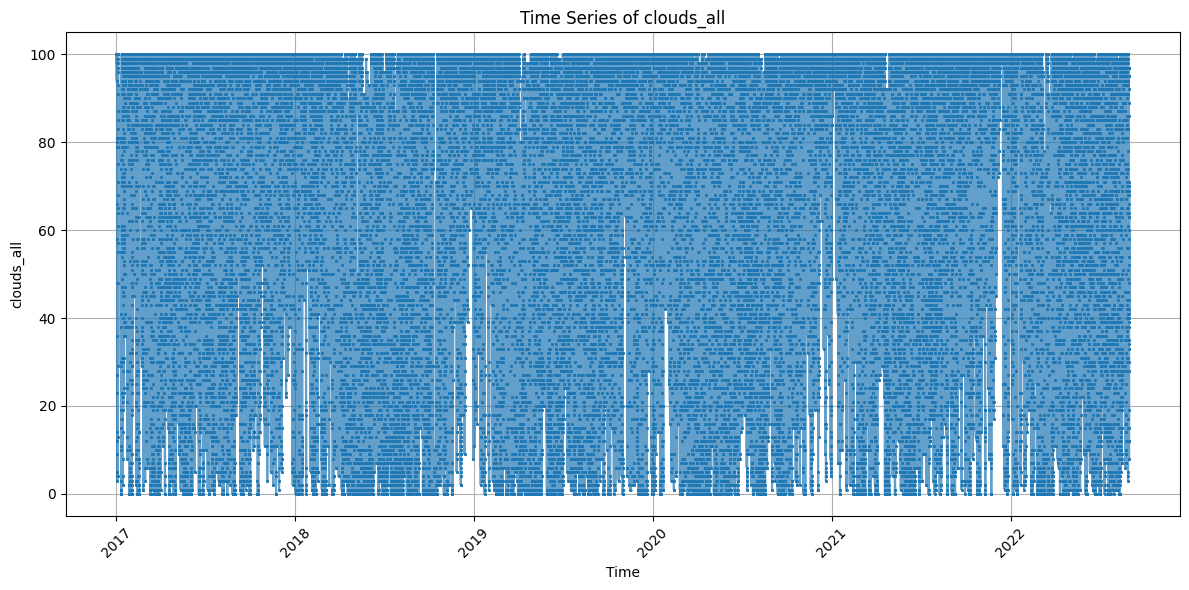

In [260]:
import matplotlib.pyplot as plt

# Variables to analyze
variables = ['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all']

# Generate histograms for distributions
for variable in variables:
    plt.figure(figsize=(8, 5))
    plt.hist(df[variable], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Generate boxplots to identify variability and outliers
for variable in variables:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[variable], vert=False)
    plt.title(f'Boxplot of {variable}')
    plt.xlabel(variable)
    plt.grid(True)
    plt.show()

# Generate time-series trends for selected variables
for variable in variables:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Time'], df[variable], alpha=0.7, linestyle='-', marker='o', markersize=1)
    plt.title(f'Time Series of {variable}')
    plt.xlabel('Time')
    plt.ylabel(variable)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Nothing affect much, raining can be ignore as raining is not everyday

### Now on day/night specific data

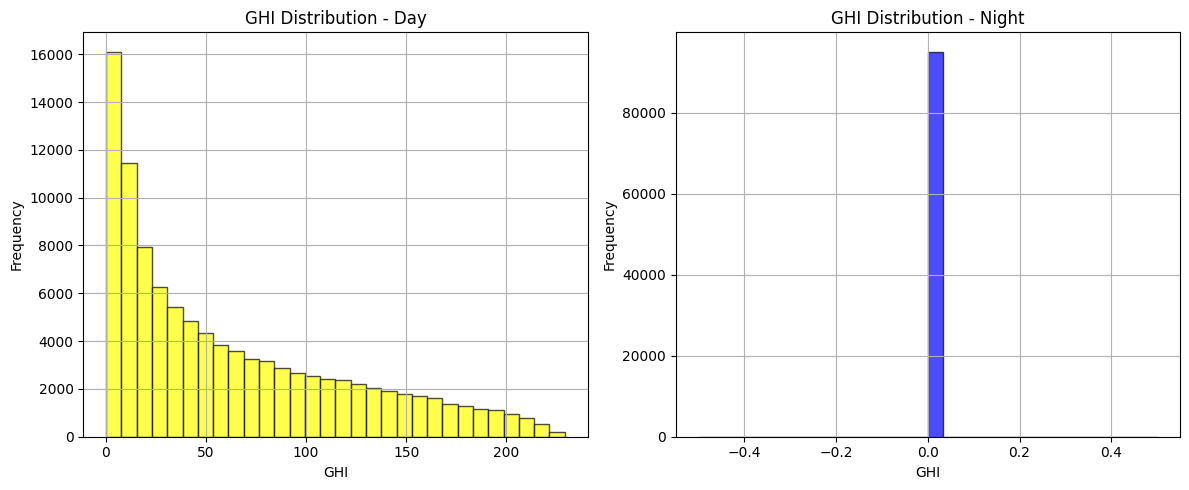

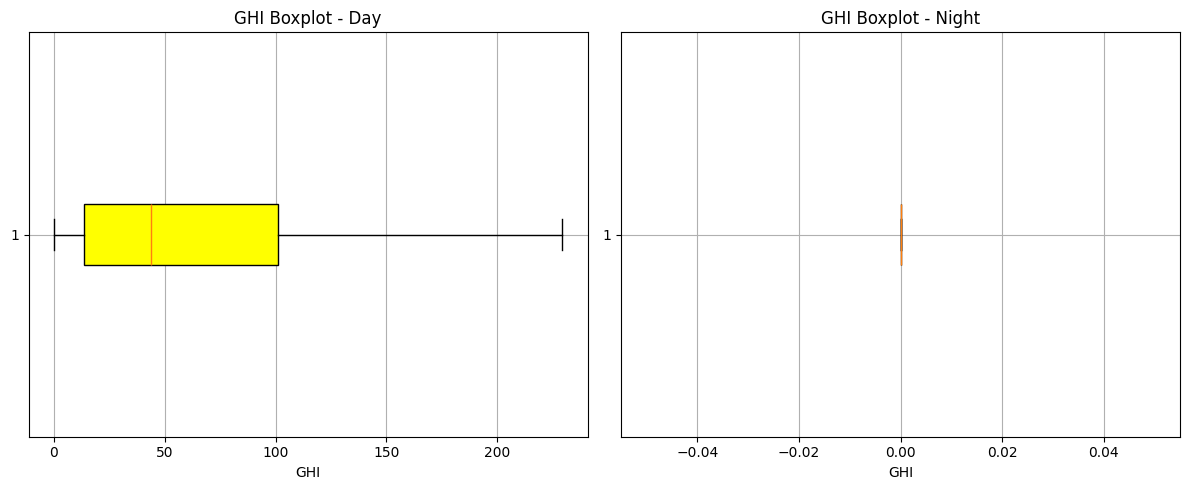

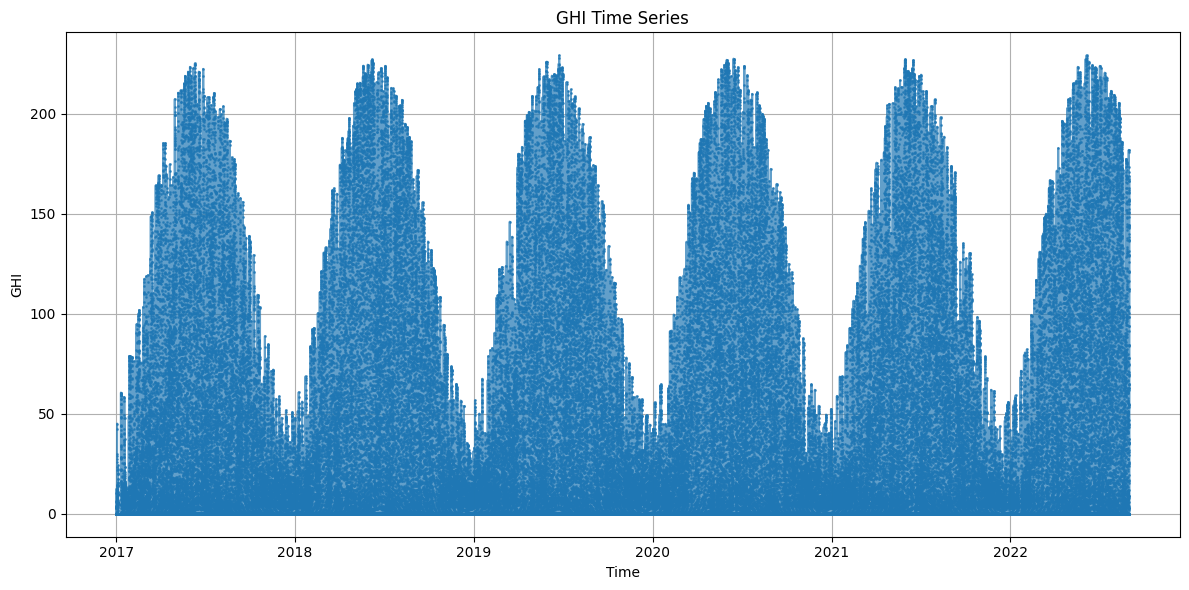

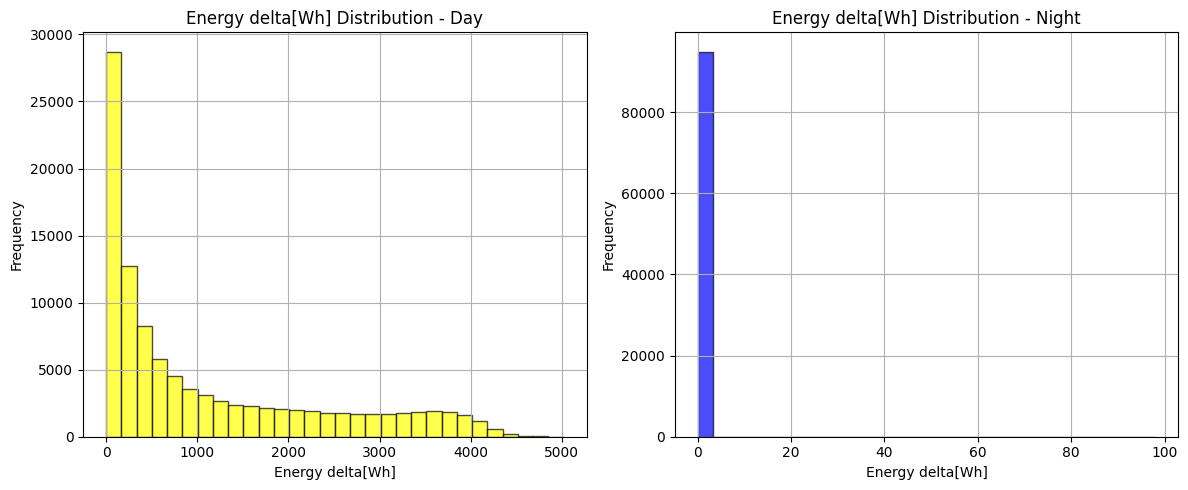

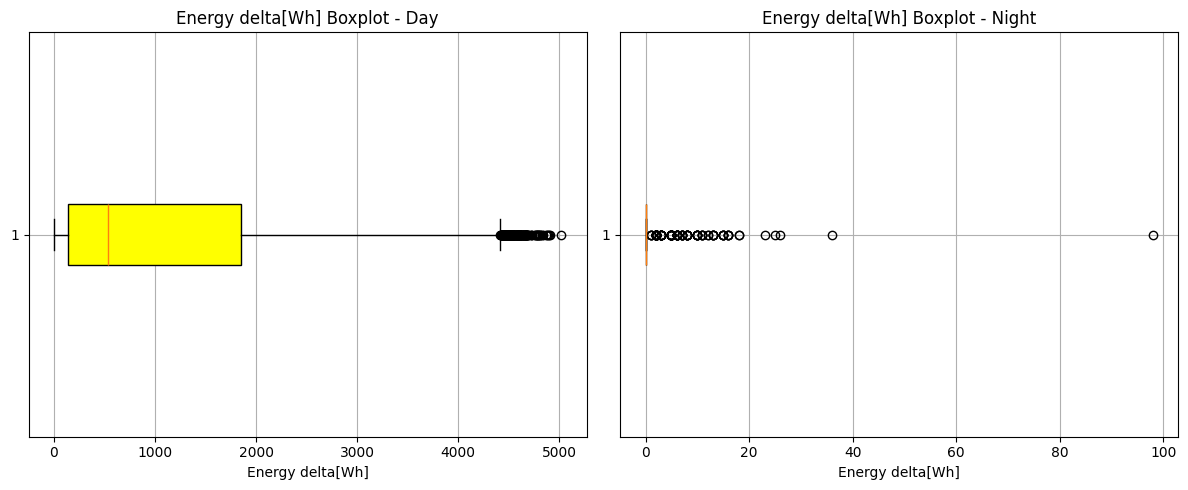

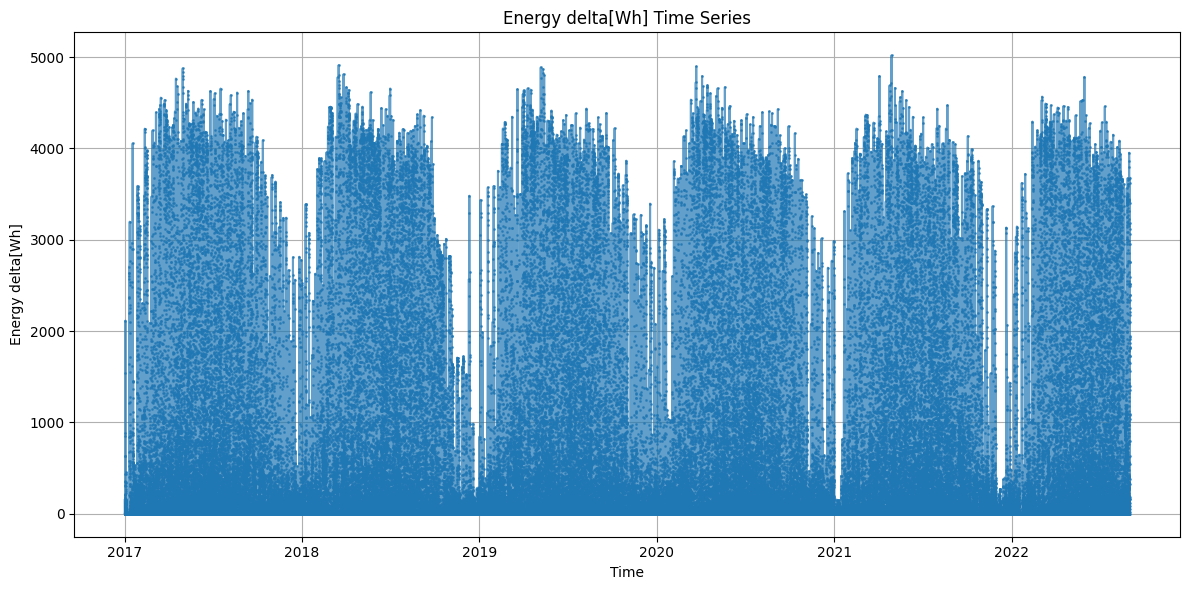

In [261]:
# Separate data into day and night
day_data = df[df['isDayTime'] == 1]
night_data = df[df['isDayTime'] == 0]

# Variables to analyze
variables = ['GHI', 'Energy delta[Wh]']

# Generate graphs for day (yellow) and night (blue)
for variable in variables:
    # Day histogram
    plt.figure(figsize=(12, 5))
    
    # Day Graph
    plt.subplot(1, 2, 1)
    plt.hist(day_data[variable], bins=30, color='yellow', edgecolor='black', alpha=0.7)
    plt.title(f'{variable} Distribution - Day')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
    
    # Night Graph
    plt.subplot(1, 2, 2)
    plt.hist(night_data[variable], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'{variable} Distribution - Night')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Boxplots
    plt.figure(figsize=(12, 5))
    
    # Day Boxplot
    plt.subplot(1, 2, 1)
    plt.boxplot(day_data[variable], vert=False, patch_artist=True,
                boxprops=dict(facecolor='yellow', color='black'))
    plt.title(f'{variable} Boxplot - Day')
    plt.xlabel(variable)
    plt.grid(True)
    
    # Night Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(night_data[variable], vert=False, patch_artist=True,
                boxprops=dict(facecolor='blue', color='black'))
    plt.title(f'{variable} Boxplot - Night')
    plt.xlabel(variable)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(df['Time'], df[variable], alpha=0.7, linestyle='-', marker='o', markersize=1)
    plt.title(f'{variable} Time Series')
    plt.xlabel('Time')
    plt.ylabel(variable)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    


### Outlier found in the energy delta in boxplot now we will clean it

In [262]:
# Filter rows where Energy delta[Wh] has significant values during the night
night_outliers = night_data[night_data['Energy delta[Wh]'] > 0]

night_outliers


Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
3808   2017-02-14 16:00:00                 8  0.0   1.5      1037        60   
5250   2017-03-01 16:30:00                 2  0.0   6.4       999        73   
6788   2017-03-17 17:00:00                 2  0.0   5.0      1007        67   
9960   2017-04-19 18:00:00                 6  0.0   2.3      1034        65   
10729  2017-04-27 18:15:00                 5  0.0   7.9      1015        74   
...                    ...               ...  ...   ...       ...       ...   
188621 2022-06-07 19:15:00                 5  0.0  17.8      1011        77   
191885 2022-07-11 19:15:00                 5  0.0  17.9      1020        67   
193132 2022-07-24 19:00:00                 6  0.0  21.7      1018        61   
194762 2022-08-10 18:30:00                 3  0.0  22.7      1025        45   
196104 2022-08-24 18:00:00                 5  0.0  20.7      1021        80   

        wind_speed  rain_1h  snow_1h  clouds_all  isDayTime  Month  
3808           1.0      0.0      0.0           0          0      2  
5250           2.8      0.0      0.0          79          0      3  
6788           5.4      0.0      0.0          99          0      3  
9960           4.3      0.0      0.0           9          0      4  
10729          0.3      0.0      0.0          47          0      4  
...            ...      ...      ...         ...        ...    ...  
188621         3.3      0.0      0.0          71          0      6  
191885         2.6      0.0      0.0          21          0      7  
193132         1.9      0.0      0.0          96          0      7  
194762         3.2      0.0      0.0           0          0      8  
196104         2.8      0.0      0.0          16          0      8  

[136 rows x 12 columns]

In [263]:
# processed_df is to prevent changes to the original dataset
processed_df = df.copy()
processed_df['Time'] = pd.to_datetime(processed_df['Time'])
processed_df = processed_df.set_index('Time')  # Set 'Time' as the index

# Replace outliers (Energy delta[Wh] > 0 during night) with 0
outlier_condition = (processed_df['isDayTime'] == 0) & (processed_df['Energy delta[Wh]'] > 0)
processed_df.loc[outlier_condition, 'Energy delta[Wh]'] = 0

# Reset the index to restore the original structure
processed_df = processed_df.reset_index()

# Display the updated dataset after treating outliers
processed_df.head()



Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0 2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1 2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2 2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3 2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4 2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isDayTime  Month  
0         4.9      0.0      0.0         100          0      1  
1         4.9      0.0      0.0         100          0      1  
2         4.9      0.0      0.0         100          0      1  
3         4.9      0.0      0.0         100          0      1  
4         5.2      0.0      0.0         100          0      1

In [264]:
df = processed_df.copy()
# Separate data into day and night
day_data = df[df['isDayTime'] == 1]
night_data = df[df['isDayTime'] == 0]

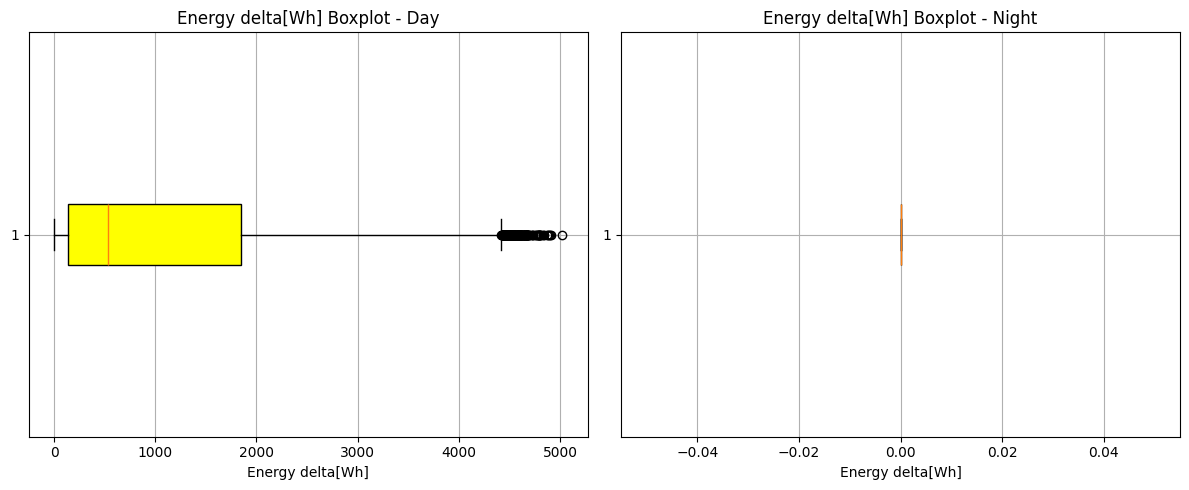

In [265]:
variable = 'Energy delta[Wh]'
# Boxplots
plt.figure(figsize=(12, 5))

# Day Boxplot
plt.subplot(1, 2, 1)
plt.boxplot(day_data[variable], vert=False, patch_artist=True,
            boxprops=dict(facecolor='yellow', color='black'))
plt.title(f'{variable} Boxplot - Day')
plt.xlabel(variable)
plt.grid(True)

# Night Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(night_data[variable], vert=False, patch_artist=True,
            boxprops=dict(facecolor='blue', color='black'))
plt.title(f'{variable} Boxplot - Night')
plt.xlabel(variable)
plt.grid(True)

plt.tight_layout()
plt.show()

### Now on snowdata

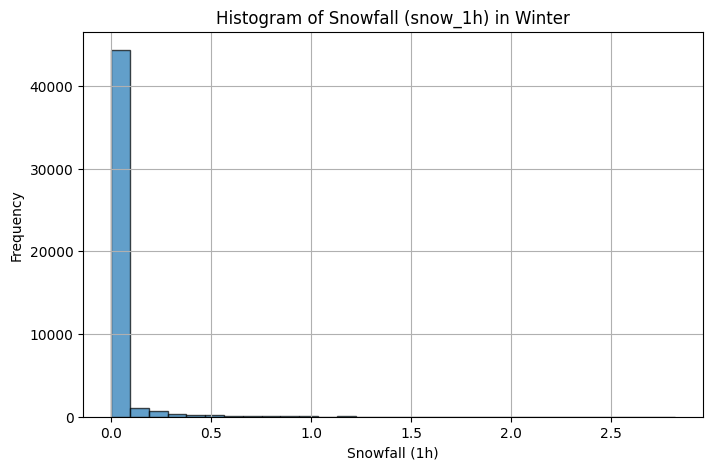

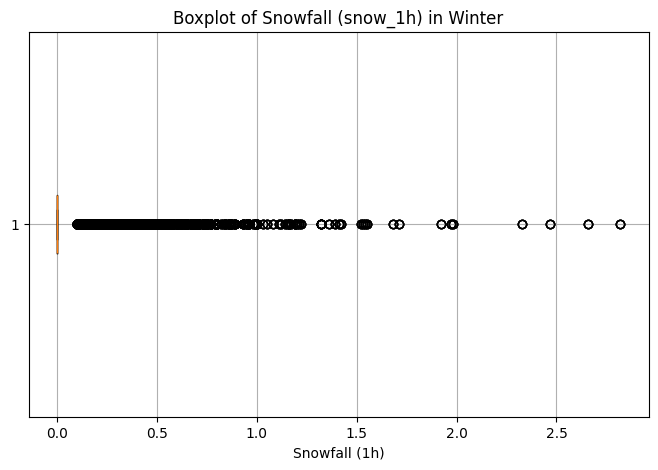

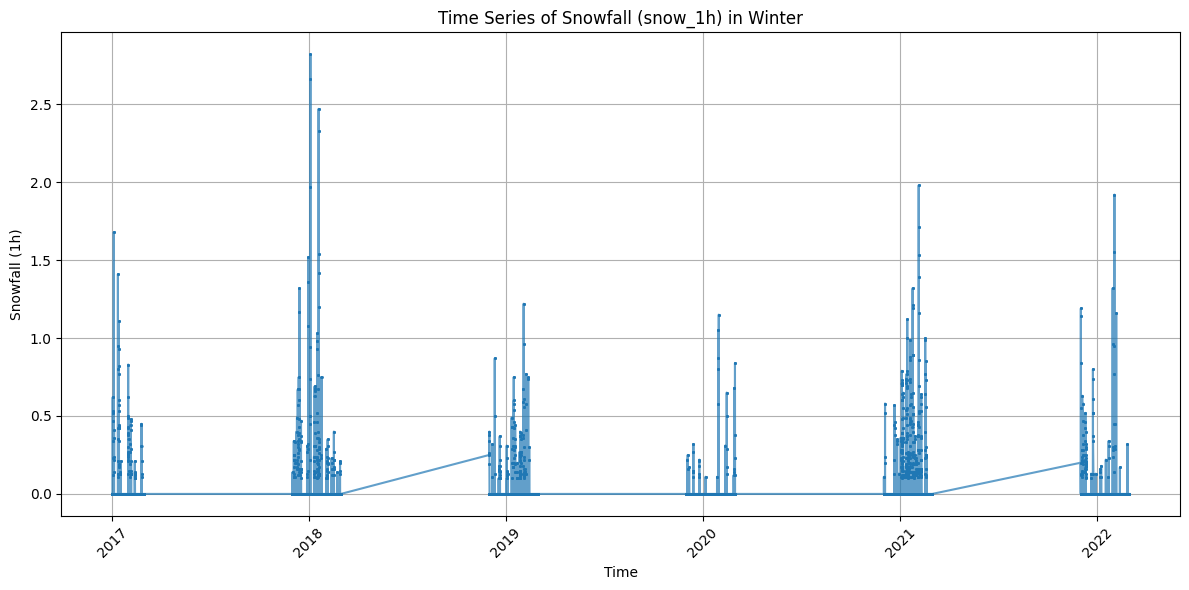

count    47424.000000
mean         0.023660
std          0.123478
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.820000
Name: snow_1h, dtype: float64

In [281]:
# Filter the winter dataframe for snowfall analysis
winter_snow_data = winter_df.copy()

# Descriptive statistics for snow_1h in the winter data
snow_stats = winter_snow_data['snow_1h'].describe()

# Visualization
# Histogram for snowfall distribution
plt.figure(figsize=(8, 5))
plt.hist(winter_snow_data['snow_1h'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Snowfall (snow_1h) in Winter')
plt.xlabel('Snowfall (1h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot for snowfall variability and outliers
plt.figure(figsize=(8, 5))
plt.boxplot(winter_snow_data['snow_1h'], vert=False)
plt.title('Boxplot of Snowfall (snow_1h) in Winter')
plt.xlabel('Snowfall (1h)')
plt.grid(True)
plt.show()

# Time-series plot for snowfall trends
plt.figure(figsize=(12, 6))
plt.plot(winter_snow_data['Time'], winter_snow_data['snow_1h'], linestyle='-', marker='o', markersize=1, alpha=0.7)
plt.title('Time Series of Snowfall (snow_1h) in Winter')
plt.xlabel('Time')
plt.ylabel('Snowfall (1h)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

snow_stats


### Snow same as rain not everyday having so also normal

### Only the day night data is preprocessed other is fine

# Feature Enginnering some extra column

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              196776 non-null  datetime64[ns]
 1   Energy delta[Wh]  196776 non-null  int64         
 2   GHI               196776 non-null  float64       
 3   temp              196776 non-null  float64       
 4   pressure          196776 non-null  int64         
 5   humidity          196776 non-null  int64         
 6   wind_speed        196776 non-null  float64       
 7   rain_1h           196776 non-null  float64       
 8   snow_1h           196776 non-null  float64       
 9   clouds_all        196776 non-null  int64         
 10  isDayTime         196776 non-null  int32         
 11  Month             196776 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(4)
memory usage: 16.5 MB


### Data transformation

### Adding month column

In [268]:
import pandas as pd

# Ensure the 'Time' column is in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Add the month name and add it as a new column
df['Month'] = df['Time'].dt.month_name()

# Show result
# Display the Time and Month columns
print(df[['Time', 'Month']].head())  


                 Time    Month
0 2017-01-01 00:00:00  January
1 2017-01-01 00:15:00  January
2 2017-01-01 00:30:00  January
3 2017-01-01 00:45:00  January
4 2017-01-01 01:00:00  January


### Adding seasonal column

In [269]:

# Extract the hour
df['Hour'] = df['Time'].dt.hour

# Extract the week number
df['Week'] = df['Time'].dt.isocalendar().week

# Determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:  # December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # June, July, August
        return 'Summer'
    elif month in [9, 10, 11]:  # September, October, November
        return 'Autumn'

# Apply the season function to the 'Time' column
df['Season'] = df['Time'].dt.month.apply(get_season)


# Add the day of the week column
df['Day'] = df['Time'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

# Verify the changes
print(df[['Time', 'Season', 'Month' , 'Week', 'Day', 'Hour']].head())




                 Time  Season    Month  Week     Day  Hour
0 2017-01-01 00:00:00  Winter  January    52  Sunday     0
1 2017-01-01 00:15:00  Winter  January    52  Sunday     0
2 2017-01-01 00:30:00  Winter  January    52  Sunday     0
3 2017-01-01 00:45:00  Winter  January    52  Sunday     0
4 2017-01-01 01:00:00  Winter  January    52  Sunday     1


# Data Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the columns to apply scaling (excluding 'Time' and categorical columns like 'isDayTime')
columns_to_scale = ['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all', 'Energy delta[Wh]']

# Create copies of the dataset
df_standardized = df.copy()

# Standardization
scaler_standard = StandardScaler()
df_standardized[columns_to_scale] = scaler_standard.fit_transform(df_standardized[columns_to_scale])

df_standardized.head()

Time  Energy delta[Wh]            GHI  \
count                         196776      1.967760e+05  196776.000000   
mean   2019-10-29 22:44:12.085620992     -3.062062e-17      32.596538   
min              2017-01-01 00:00:00     -5.484206e-01       0.000000   
25%              2018-06-02 10:26:15     -5.484206e-01       0.000000   
50%              2019-10-28 20:52:30     -5.484206e-01       1.600000   
75%              2021-03-24 07:18:45      3.825428e-03      46.800000   
max              2022-08-31 17:45:00      4.256216e+00     229.200000   
std                              NaN      1.000003e+00      52.172018   

               temp      pressure      humidity    wind_speed       rain_1h  \
count  1.967760e+05  1.967760e+05  1.967760e+05  1.967760e+05  1.967760e+05   
mean   1.321597e-17  2.614885e-15 -8.196792e-17  6.672983e-16 -3.796884e-17   
min   -3.300710e+00 -3.994762e+00 -3.704756e+00 -2.161590e+00 -2.367584e-01   
25%   -7.742596e-01 -5.521509e-01 -6.287044e-01 -7.343437e-01 -2.367584e-01   
50%   -6.135037e-02  7.377832e-02  2.684774e-01 -1.305088e-01 -2.367584e-01   
75%    7.391091e-01  5.953860e-01  7.811527e-01  5.831144e-01 -2.367584e-01   
max    3.253052e+00  3.307746e+00  1.293828e+00  5.688264e+00  2.876875e+01   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   

             snow_1h    clouds_all      isDayTime           Hour       Week  
count  196776.000000  1.967760e+05  196776.000000  196776.000000   196776.0  
mean        0.007148 -1.850958e-16       0.516994      11.498902  25.625198  
min         0.000000 -1.801176e+00       0.000000       0.000000        1.0  
25%         0.000000 -8.729374e-01       0.000000       5.000000       13.0  
50%         0.000000  4.375176e-01       1.000000      11.000000       25.0  
75%         0.000000  9.289382e-01       1.000000      17.000000       38.0  
max         2.820000  9.289382e-01       1.000000      23.000000       53.0  
std         0.069710  1.000003e+00       0.499712       6.921887  14.767178

In [285]:
df_standardized.describe()

Time  Energy delta[Wh]            GHI  \
count                         196776      1.967760e+05  196776.000000   
mean   2019-10-29 22:44:12.085620992     -3.062062e-17      32.596538   
min              2017-01-01 00:00:00     -5.484206e-01       0.000000   
25%              2018-06-02 10:26:15     -5.484206e-01       0.000000   
50%              2019-10-28 20:52:30     -5.484206e-01       1.600000   
75%              2021-03-24 07:18:45      3.825428e-03      46.800000   
max              2022-08-31 17:45:00      4.256216e+00     229.200000   
std                              NaN      1.000003e+00      52.172018   

               temp      pressure      humidity    wind_speed       rain_1h  \
count  1.967760e+05  1.967760e+05  1.967760e+05  1.967760e+05  1.967760e+05   
mean   1.321597e-17  2.614885e-15 -8.196792e-17  6.672983e-16 -3.796884e-17   
min   -3.300710e+00 -3.994762e+00 -3.704756e+00 -2.161590e+00 -2.367584e-01   
25%   -7.742596e-01 -5.521509e-01 -6.287044e-01 -7.343437e-01 -2.367584e-01   
50%   -6.135037e-02  7.377832e-02  2.684774e-01 -1.305088e-01 -2.367584e-01   
75%    7.391091e-01  5.953860e-01  7.811527e-01  5.831144e-01 -2.367584e-01   
max    3.253052e+00  3.307746e+00  1.293828e+00  5.688264e+00  2.876875e+01   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   

             snow_1h    clouds_all      isDayTime           Hour       Week  
count  196776.000000  1.967760e+05  196776.000000  196776.000000   196776.0  
mean        0.007148 -1.850958e-16       0.516994      11.498902  25.625198  
min         0.000000 -1.801176e+00       0.000000       0.000000        1.0  
25%         0.000000 -8.729374e-01       0.000000       5.000000       13.0  
50%         0.000000  4.375176e-01       1.000000      11.000000       25.0  
75%         0.000000  9.289382e-01       1.000000      17.000000       38.0  
max         2.820000  9.289382e-01       1.000000      23.000000       53.0  
std         0.069710  1.000003e+00       0.499712       6.921887  14.767178

# Data Normalization

In [ ]:
from sklearn.preprocessing import  MinMaxScaler


# Select the columns to apply scaling (excluding 'Time' and categorical columns like 'isDayTime')
columns_to_scale = ['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all', 'Energy delta[Wh]']

# Create copies of the dataset
df_normalized = df.copy()

# Normalization
scaler_normal = MinMaxScaler()
df_normalized[columns_to_scale] = scaler_normal.fit_transform(df_normalized[columns_to_scale])

df_normalized.head()


Time  Energy delta[Wh]            GHI  \
count                         196776     196776.000000  196776.000000   
mean   2019-10-29 22:44:12.085620992          0.114144      32.596538   
min              2017-01-01 00:00:00          0.000000       0.000000   
25%              2018-06-02 10:26:15          0.000000       0.000000   
50%              2019-10-28 20:52:30          0.000000       1.600000   
75%              2021-03-24 07:18:45          0.114940      46.800000   
max              2022-08-31 17:45:00          1.000000     229.200000   
std                              NaN          0.208133      52.172018   

                temp       pressure       humidity     wind_speed  \
count  196776.000000  196776.000000  196776.000000  196776.000000   
mean        0.503636       0.547040       0.741161       0.275367   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.385496       0.471429       0.615385       0.181818   
50%         0.494275       0.557143       0.794872       0.258741   
75%         0.616412       0.628571       0.897436       0.349650   
max         1.000000       1.000000       1.000000       1.000000   
std         0.152585       0.136940       0.200057       0.127391   

             rain_1h        snow_1h     clouds_all      isDayTime  \
count  196776.000000  196776.000000  196776.000000  196776.000000   
mean        0.008163       0.007148       0.659744       0.516994   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.340000       0.000000   
50%         0.000000       0.000000       0.820000       1.000000   
75%         0.000000       0.000000       1.000000       1.000000   
max         1.000000       2.820000       1.000000       1.000000   
std         0.034476       0.069710       0.366286       0.499712   

                Hour       Week  
count  196776.000000   196776.0  
mean       11.498902  25.625198  
min         0.000000        1.0  
25%         5.000000       13.0  
50%        11.000000       25.0  
75%        17.000000       38.0  
max        23.000000       53.0  
std         6.921887  14.767178

In [ ]:
df_normalized.describe()

Time  Energy delta[Wh]            GHI  \
count                         196776     196776.000000  196776.000000   
mean   2019-10-29 22:44:12.085620992          0.114144      32.596538   
min              2017-01-01 00:00:00          0.000000       0.000000   
25%              2018-06-02 10:26:15          0.000000       0.000000   
50%              2019-10-28 20:52:30          0.000000       1.600000   
75%              2021-03-24 07:18:45          0.114940      46.800000   
max              2022-08-31 17:45:00          1.000000     229.200000   
std                              NaN          0.208133      52.172018   

                temp       pressure       humidity     wind_speed  \
count  196776.000000  196776.000000  196776.000000  196776.000000   
mean        0.503636       0.547040       0.741161       0.275367   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.385496       0.471429       0.615385       0.181818   
50%         0.494275       0.557143       0.794872       0.258741   
75%         0.616412       0.628571       0.897436       0.349650   
max         1.000000       1.000000       1.000000       1.000000   
std         0.152585       0.136940       0.200057       0.127391   

             rain_1h        snow_1h     clouds_all      isDayTime  \
count  196776.000000  196776.000000  196776.000000  196776.000000   
mean        0.008163       0.007148       0.659744       0.516994   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.340000       0.000000   
50%         0.000000       0.000000       0.820000       1.000000   
75%         0.000000       0.000000       1.000000       1.000000   
max         1.000000       2.820000       1.000000       1.000000   
std         0.034476       0.069710       0.366286       0.499712   

                Hour       Week  
count  196776.000000   196776.0  
mean       11.498902  25.625198  
min         0.000000        1.0  
25%         5.000000       13.0  
50%        11.000000       25.0  
75%        17.000000       38.0  
max        23.000000       53.0  
std         6.921887  14.767178

# Finding Relations

In [272]:
df.head()

Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0 2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1 2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2 2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3 2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4 2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isDayTime    Month  Hour  Week  \
0         4.9      0.0      0.0         100          0  January     0    52   
1         4.9      0.0      0.0         100          0  January     0    52   
2         4.9      0.0      0.0         100          0  January     0    52   
3         4.9      0.0      0.0         100          0  January     0    52   
4         5.2      0.0      0.0         100          0  January     1    52   

   Season     Day  
0  Winter  Sunday  
1  Winter  Sunday  
2  Winter  Sunday  
3  Winter  Sunday  
4  Winter  Sunday

In [273]:
df.to_csv('solar_weather_processed.csv', index=False)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              196776 non-null  datetime64[ns]
 1   Energy delta[Wh]  196776 non-null  int64         
 2   GHI               196776 non-null  float64       
 3   temp              196776 non-null  float64       
 4   pressure          196776 non-null  int64         
 5   humidity          196776 non-null  int64         
 6   wind_speed        196776 non-null  float64       
 7   rain_1h           196776 non-null  float64       
 8   snow_1h           196776 non-null  float64       
 9   clouds_all        196776 non-null  int64         
 10  isDayTime         196776 non-null  int32         
 11  Month             196776 non-null  object        
 12  Hour              196776 non-null  int32         
 13  Week              196776 non-null  UInt32        
 14  Seas

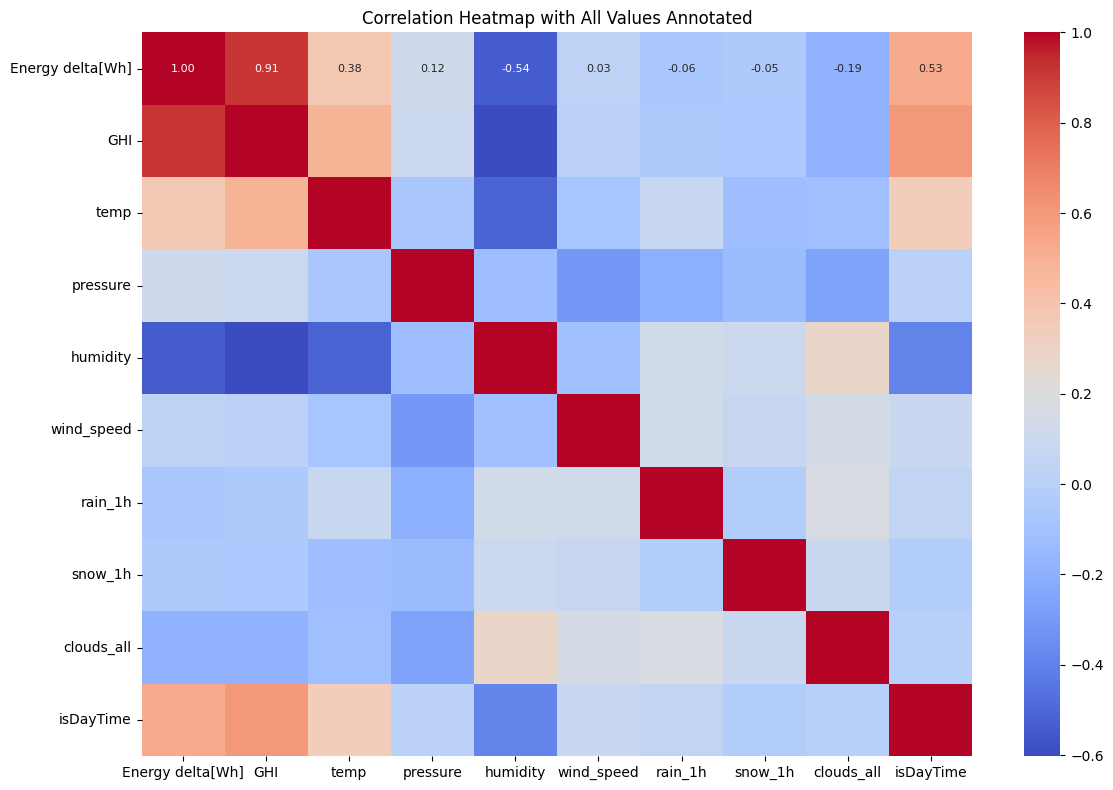

In [ ]:
# Numerical columns in the dataset
numerical_columns = [
    'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 
    'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isDayTime'
]

# Assuming processed_df is the DataFrame from the user's dataset
# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()


# Improved heatmap to show all values in boxes
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, annot_kws={"size": 8})
plt.title('Correlation Heatmap with All Values Annotated')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


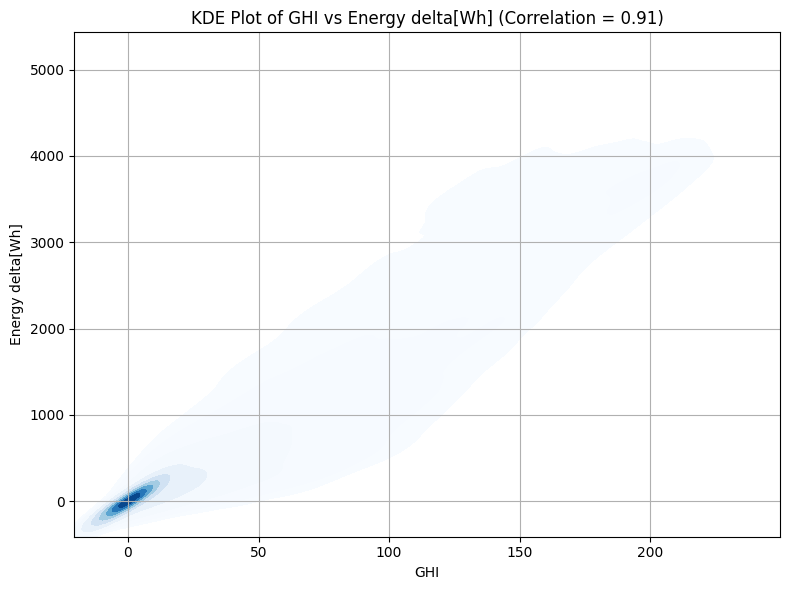

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


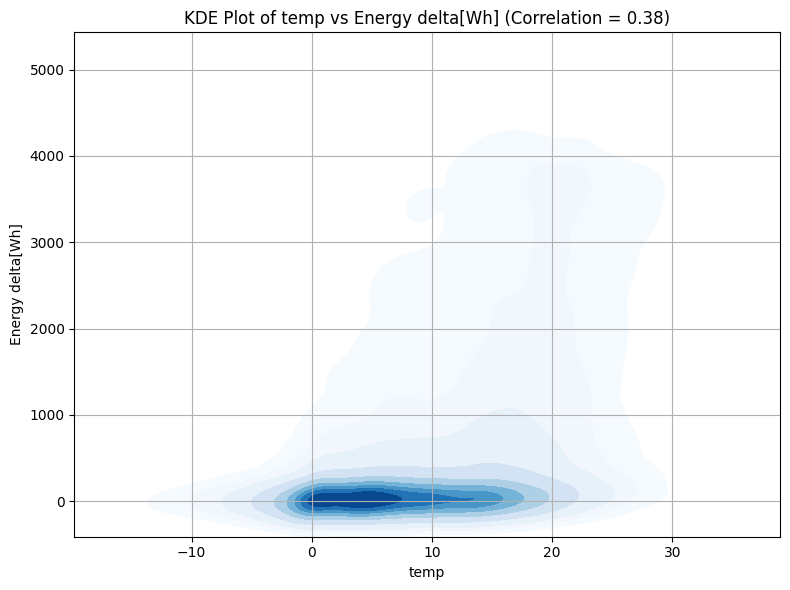

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


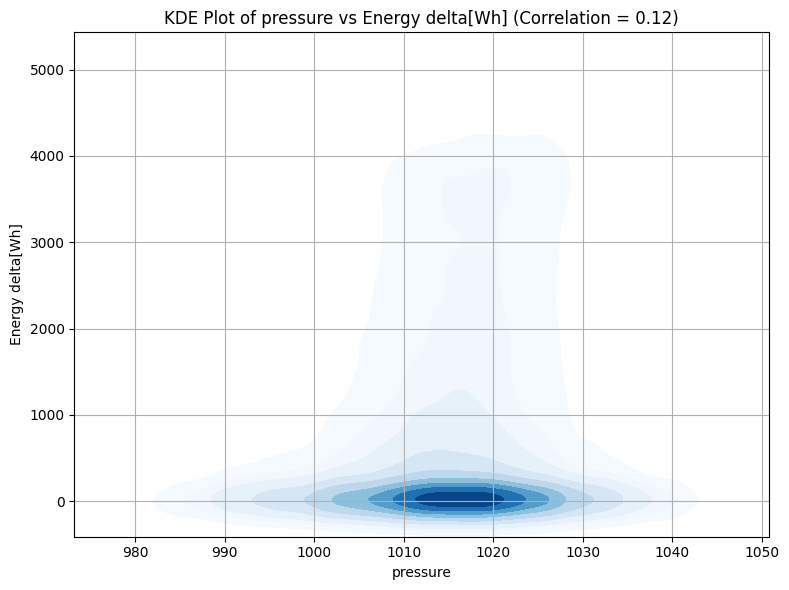

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


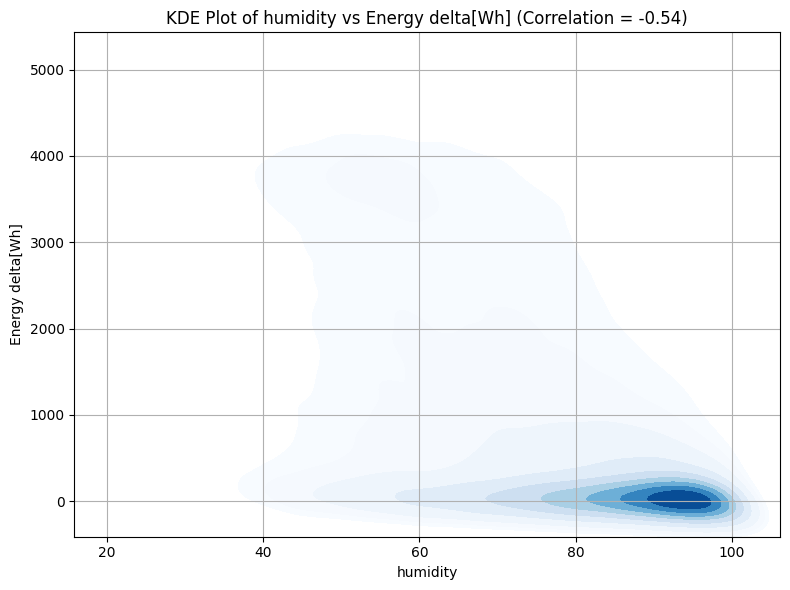

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


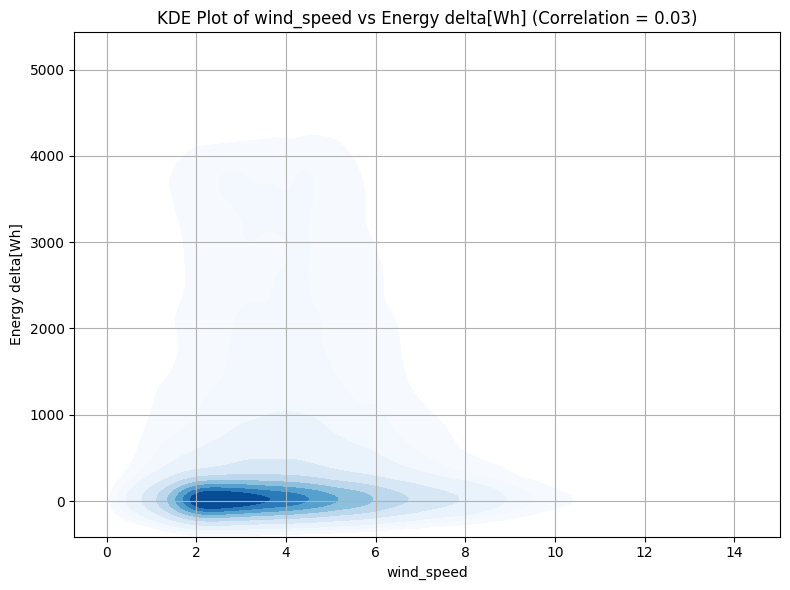

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


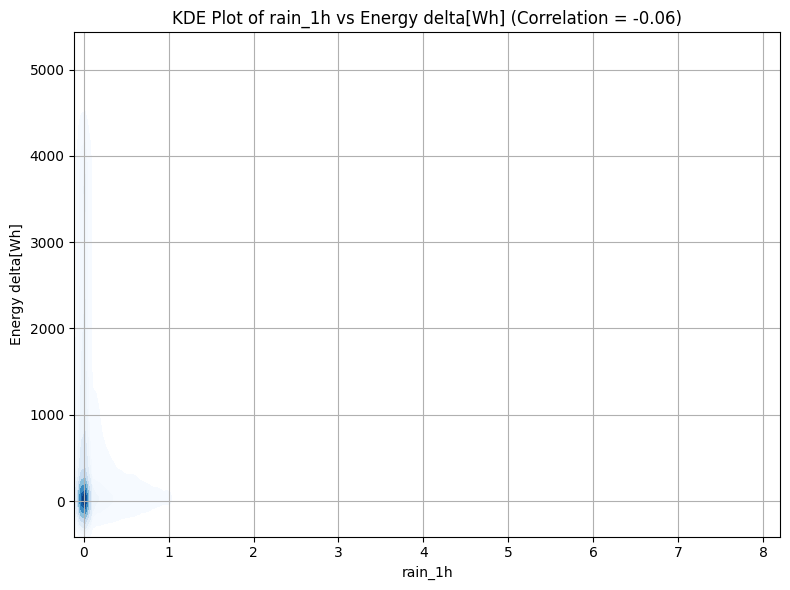

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


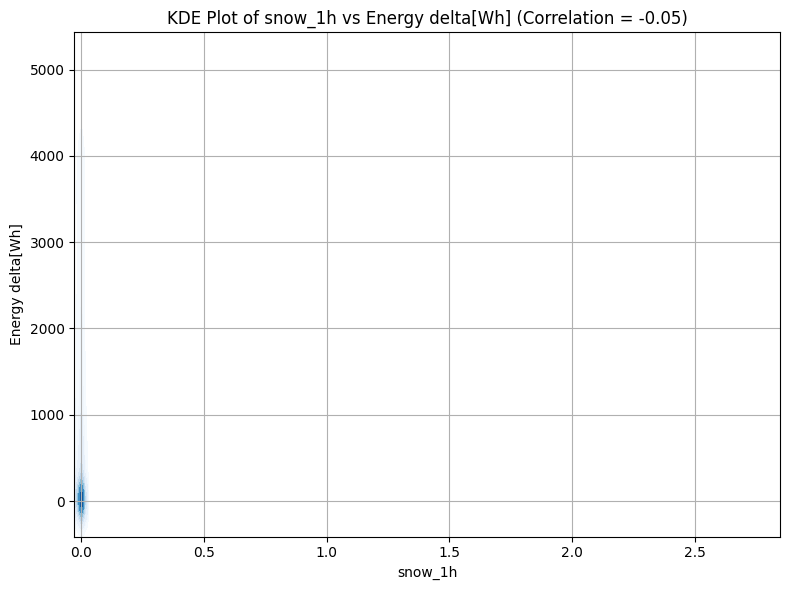

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


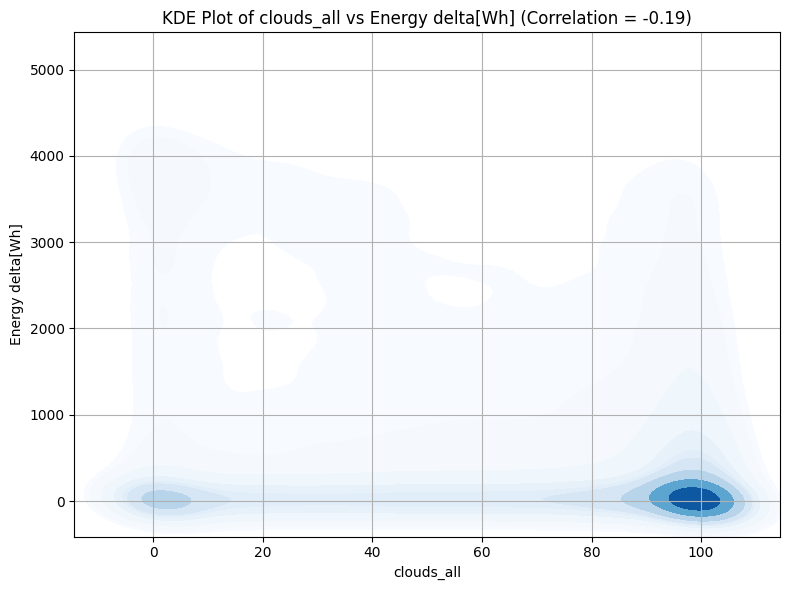

In [292]:
# Generate KDE plots for all specified variables against Energy delta[Wh]

# Variables to compare with Energy delta[Wh]
variables_to_compare = ['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all']

for variable in variables_to_compare:
    plt.figure(figsize=(8, 6))
    # KDE plot for better visualization of relationships
    sns.kdeplot(data=processed_df, x=variable, y='Energy delta[Wh]', cmap='Blues', fill=True)
    corr_value = processed_df[variable].corr(processed_df['Energy delta[Wh]'])
    plt.title(f'KDE Plot of {variable} vs Energy delta[Wh] (Correlation = {corr_value:.2f})')
    plt.xlabel(variable)
    plt.ylabel('Energy delta[Wh]')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# GHI

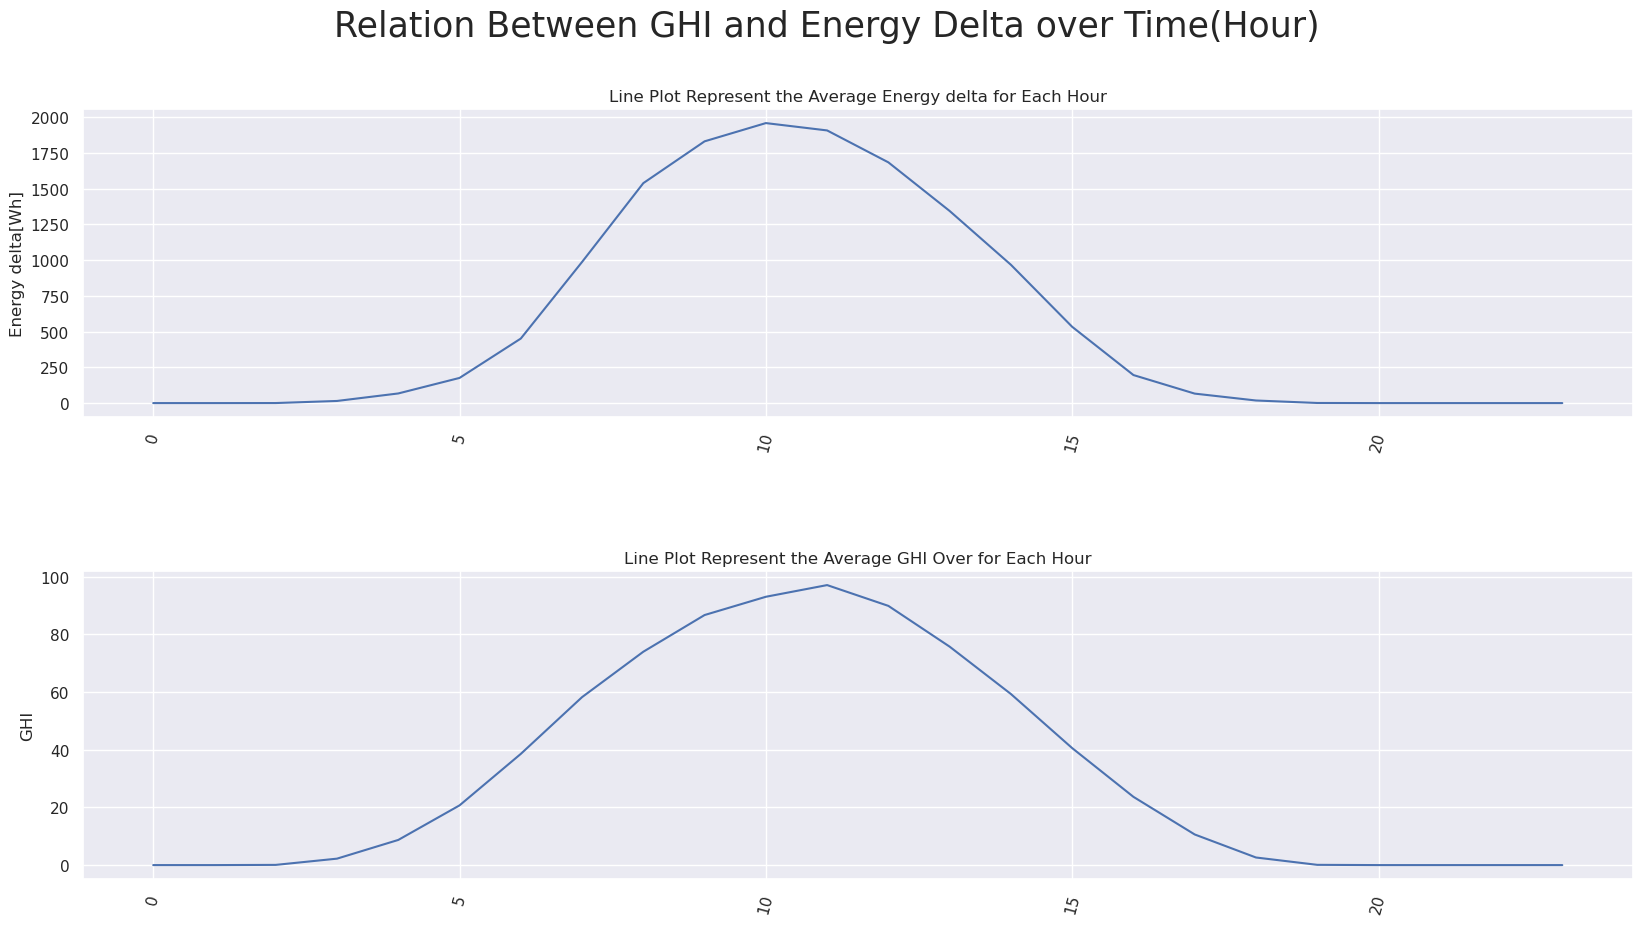

In [ ]:
figure, ax = plt.subplots(2,1,figsize = (20,10))
plt.subplots_adjust(hspace=0.5)
sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['GHI'], ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between GHI and Energy Delta over Time(Hour) ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the Average Energy delta for Each Hour')
ax[1].title.set_text('Line Plot Represent the Average GHI Over for Each Hour')
plt.show()

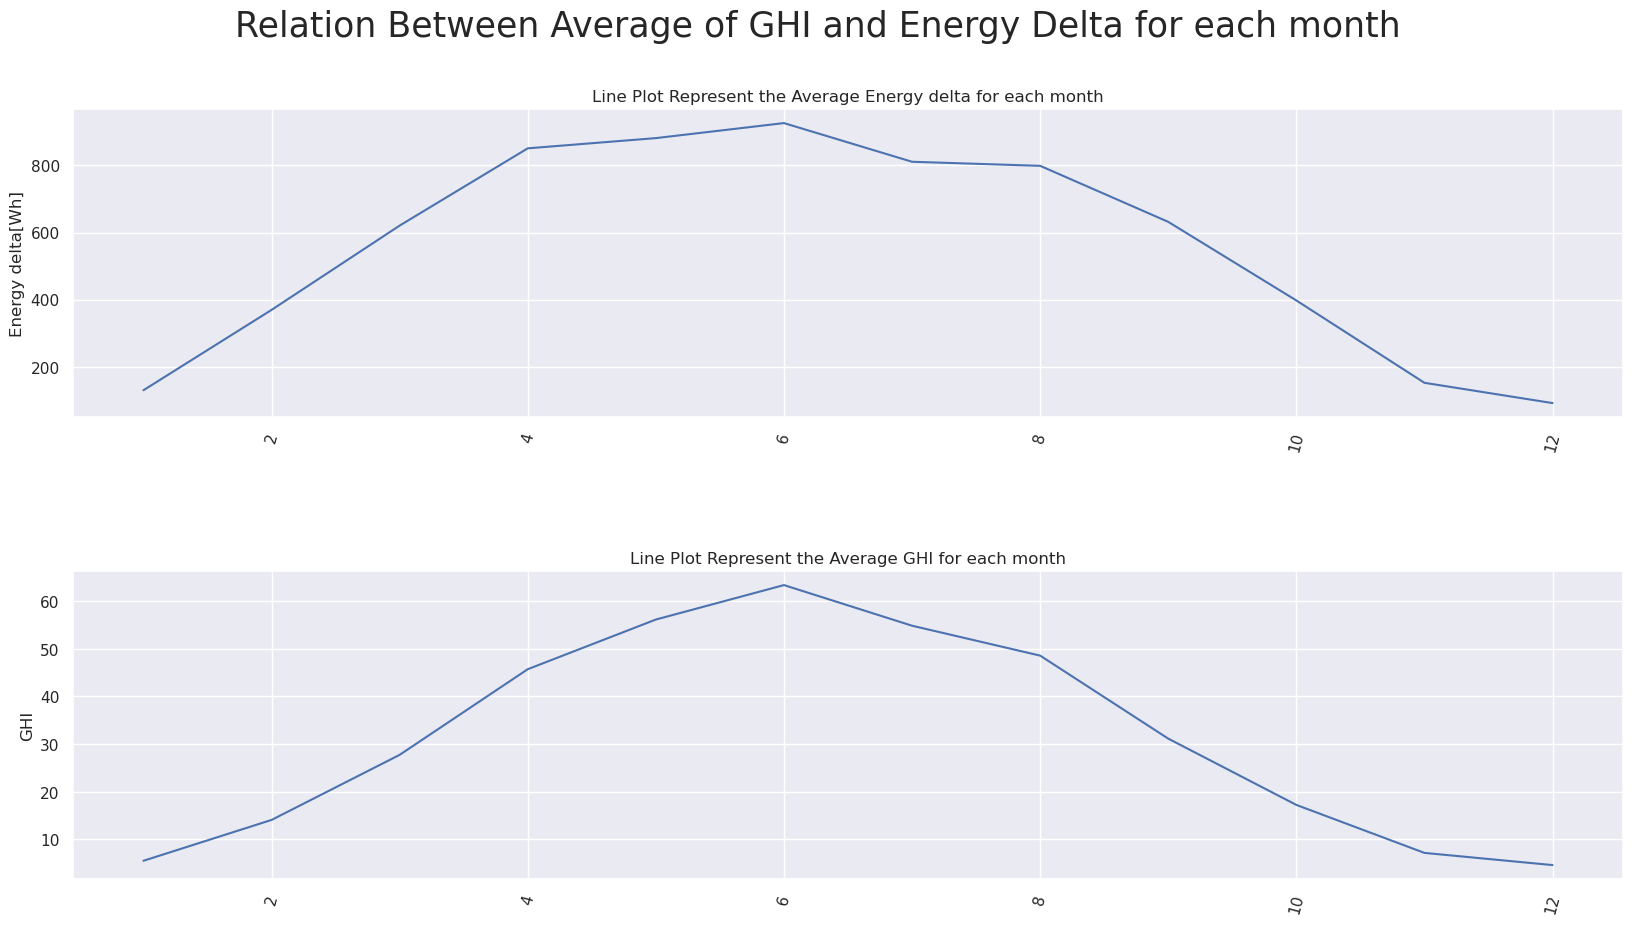

In [ ]:
figure, ax = plt.subplots(2,1,figsize = (20,10))
plt.subplots_adjust(hspace=0.5)
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['GHI'], ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between Average of GHI and Energy Delta for each month ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the Average Energy delta for each month')
ax[1].title.set_text('Line Plot Represent the Average GHI for each month')
plt.show()

# SNOW

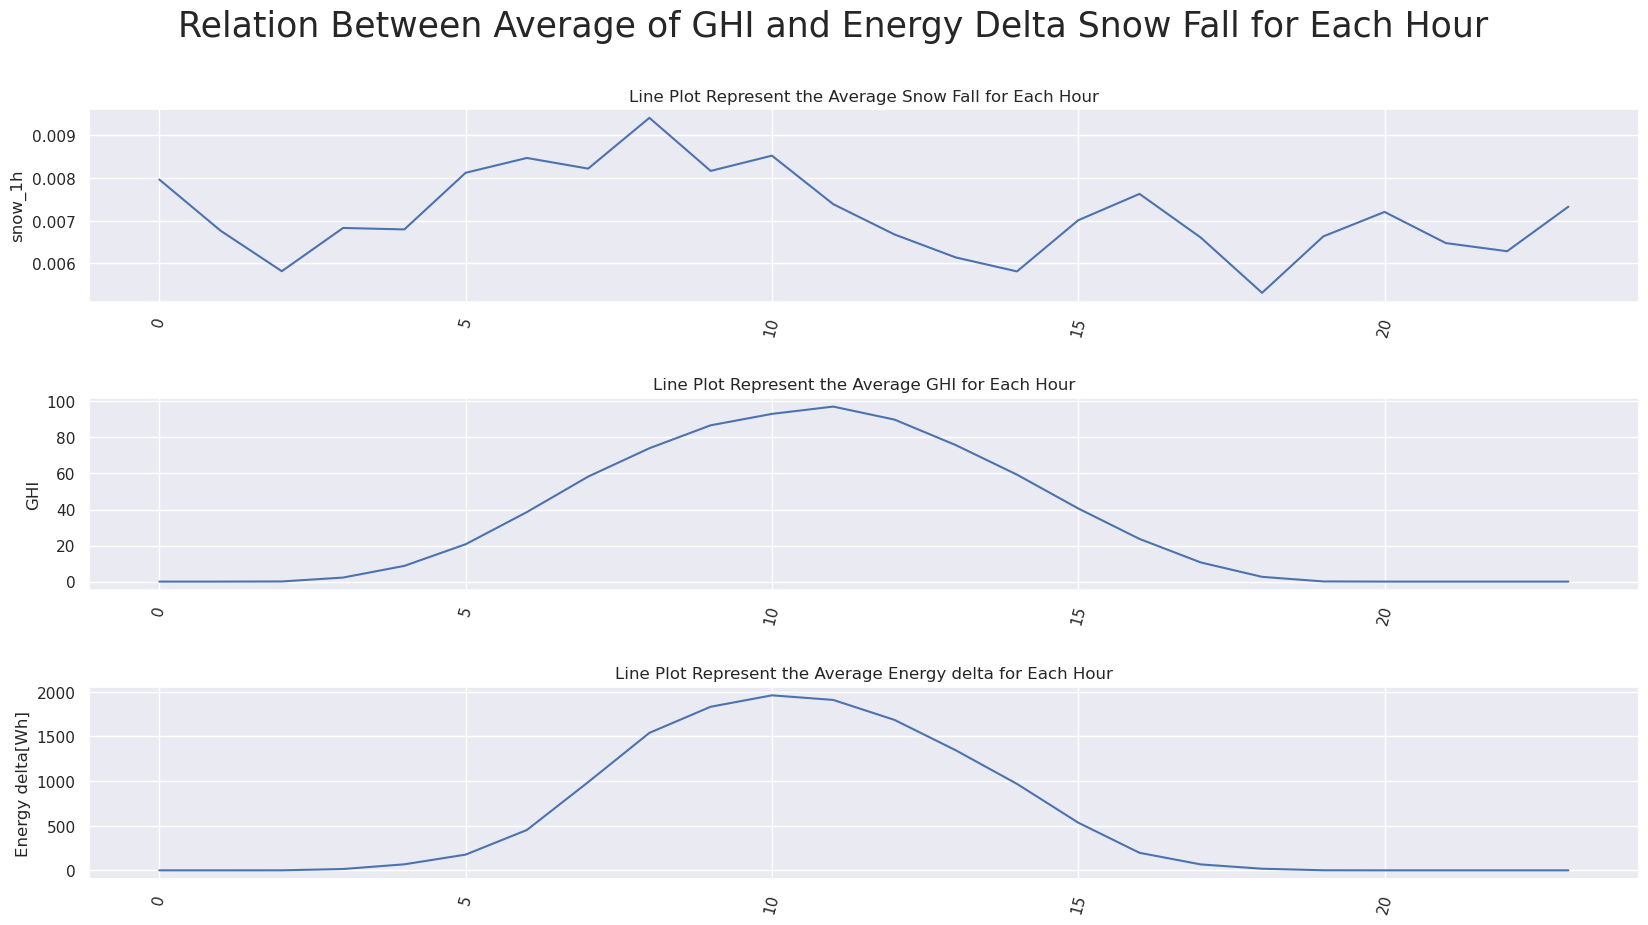

In [ ]:
figure, ax = plt.subplots(3,1,figsize = (20,10))
plt.subplots_adjust(hspace=0.5)
sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['snow_1h'], ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['GHI'], ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[2])
ax[2].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between Average of GHI and Energy Delta Snow Fall for Each Hour ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the Average Snow Fall for Each Hour')
ax[1].title.set_text('Line Plot Represent the Average GHI for Each Hour')
ax[2].title.set_text('Line Plot Represent the Average Energy delta for Each Hour')
plt.show()

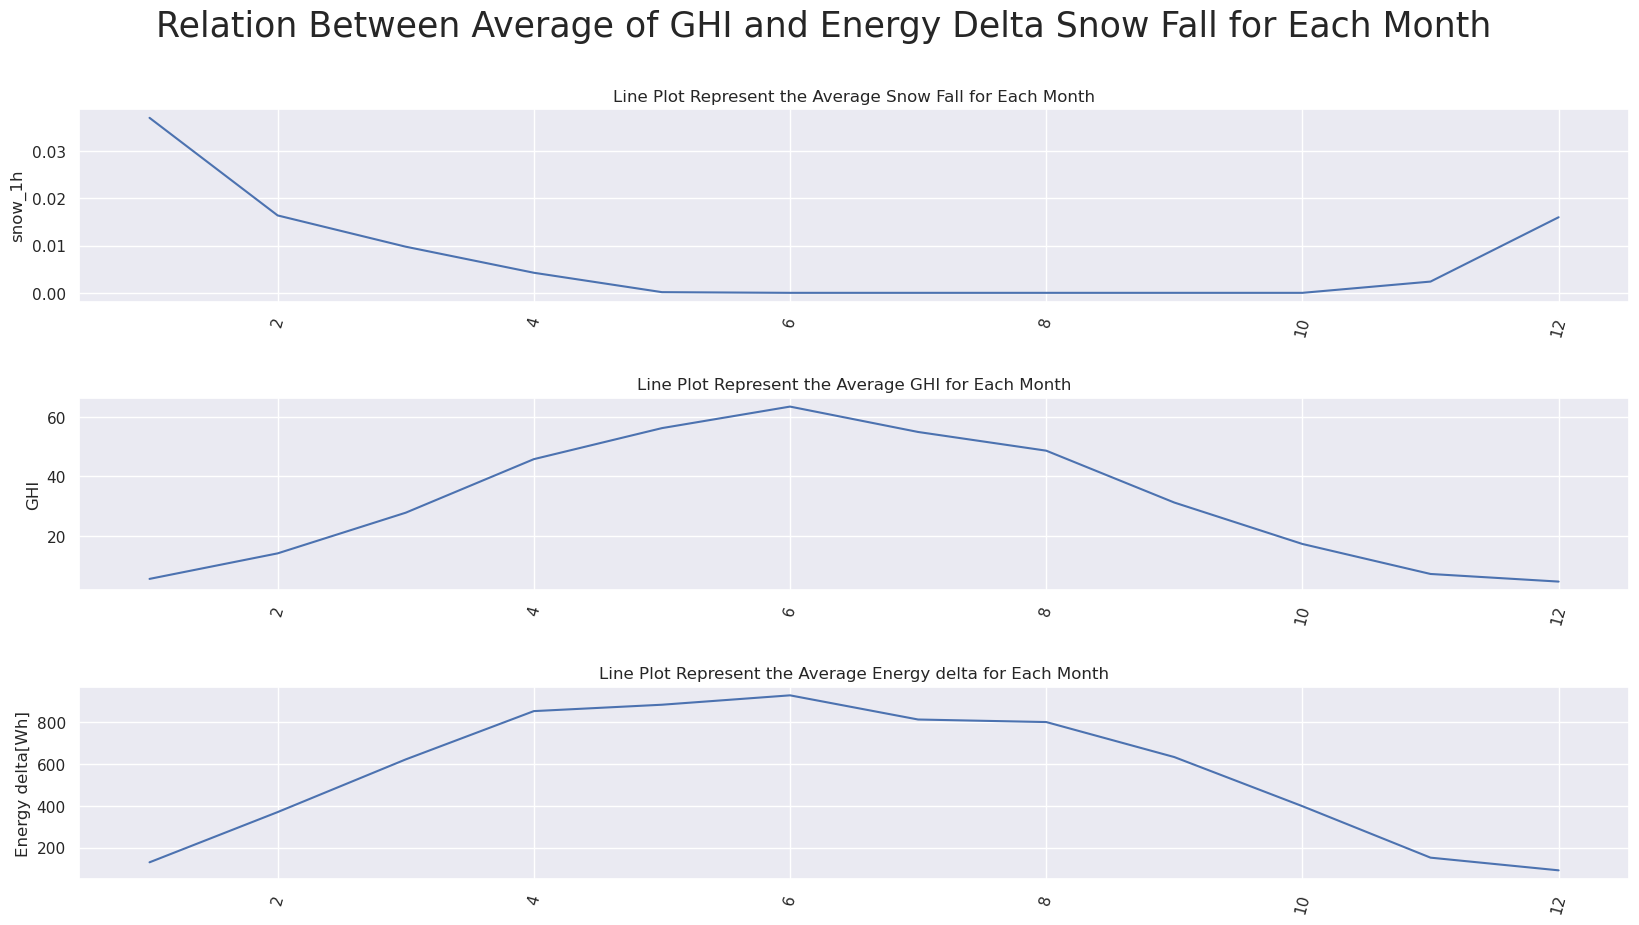

In [ ]:
figure, ax = plt.subplots(3,1,figsize = (20,10))
plt.subplots_adjust(hspace=0.5)
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['snow_1h'], ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['GHI'], ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[2])
ax[2].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between Average of GHI and Energy Delta Snow Fall for Each Month ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the Average Snow Fall for Each Month')
ax[1].title.set_text('Line Plot Represent the Average GHI for Each Month')
ax[2].title.set_text('Line Plot Represent the Average Energy delta for Each Month')
plt.show()

# Cloud

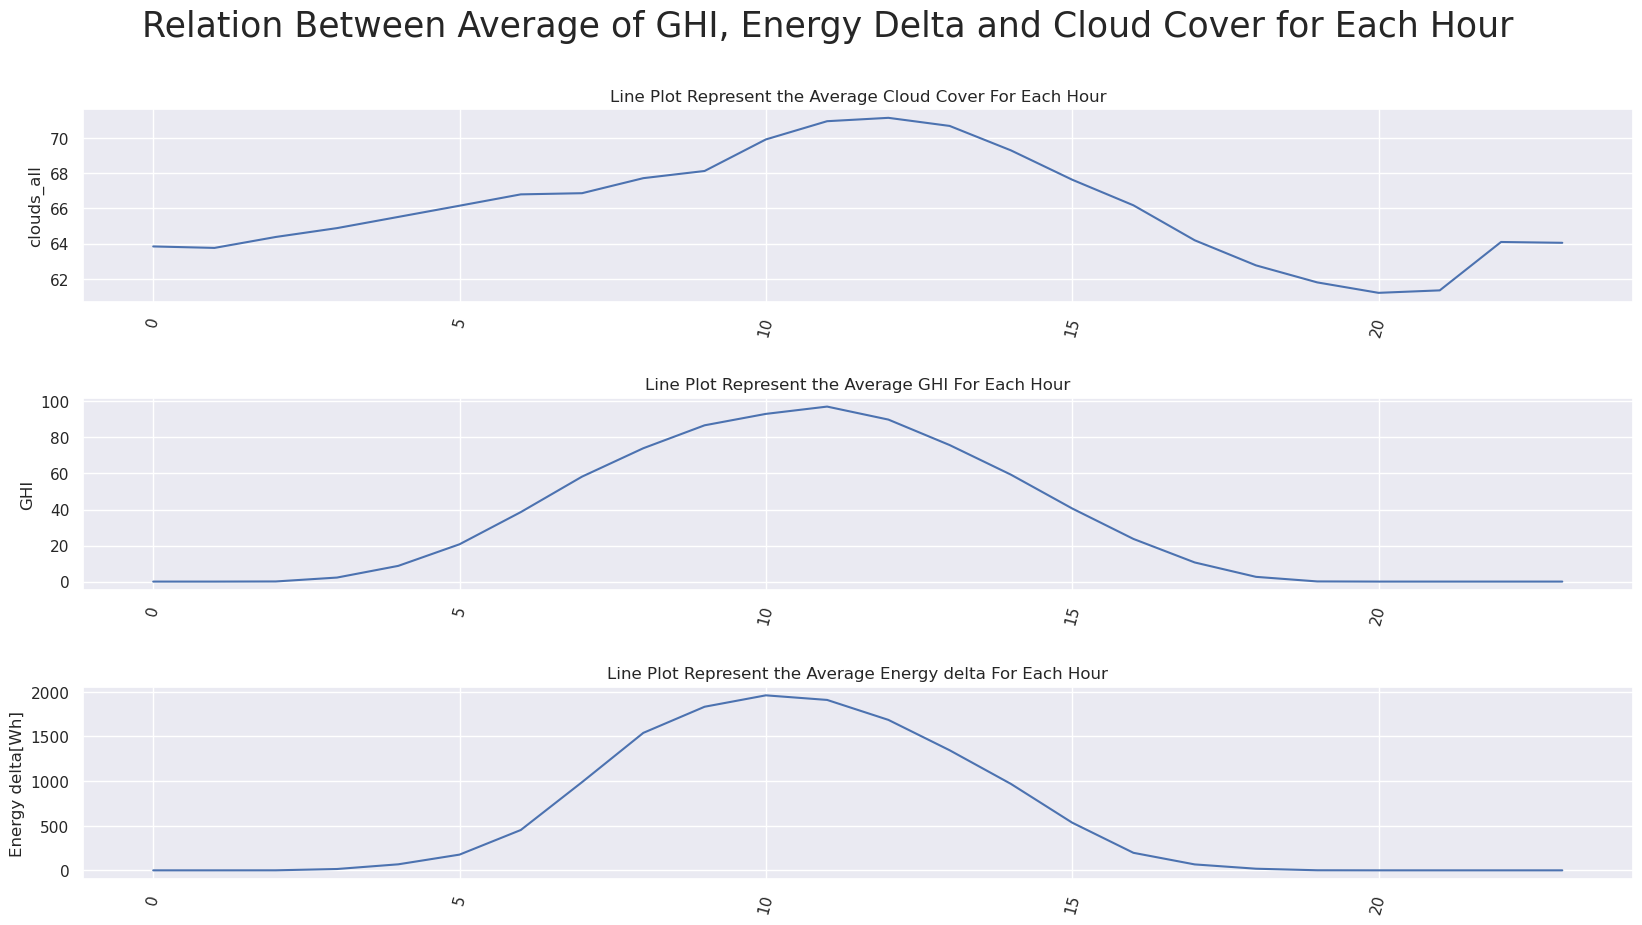

In [ ]:
figure, ax = plt.subplots(3,1,figsize = (20,10))
plt.subplots_adjust(hspace=0.5)
sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['clouds_all'], ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['GHI'], ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[2])
ax[2].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between Average of GHI, Energy Delta and Cloud Cover for Each Hour ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the Average Cloud Cover For Each Hour')
ax[1].title.set_text('Line Plot Represent the Average GHI For Each Hour')
ax[2].title.set_text('Line Plot Represent the Average Energy delta For Each Hour')
plt.show()

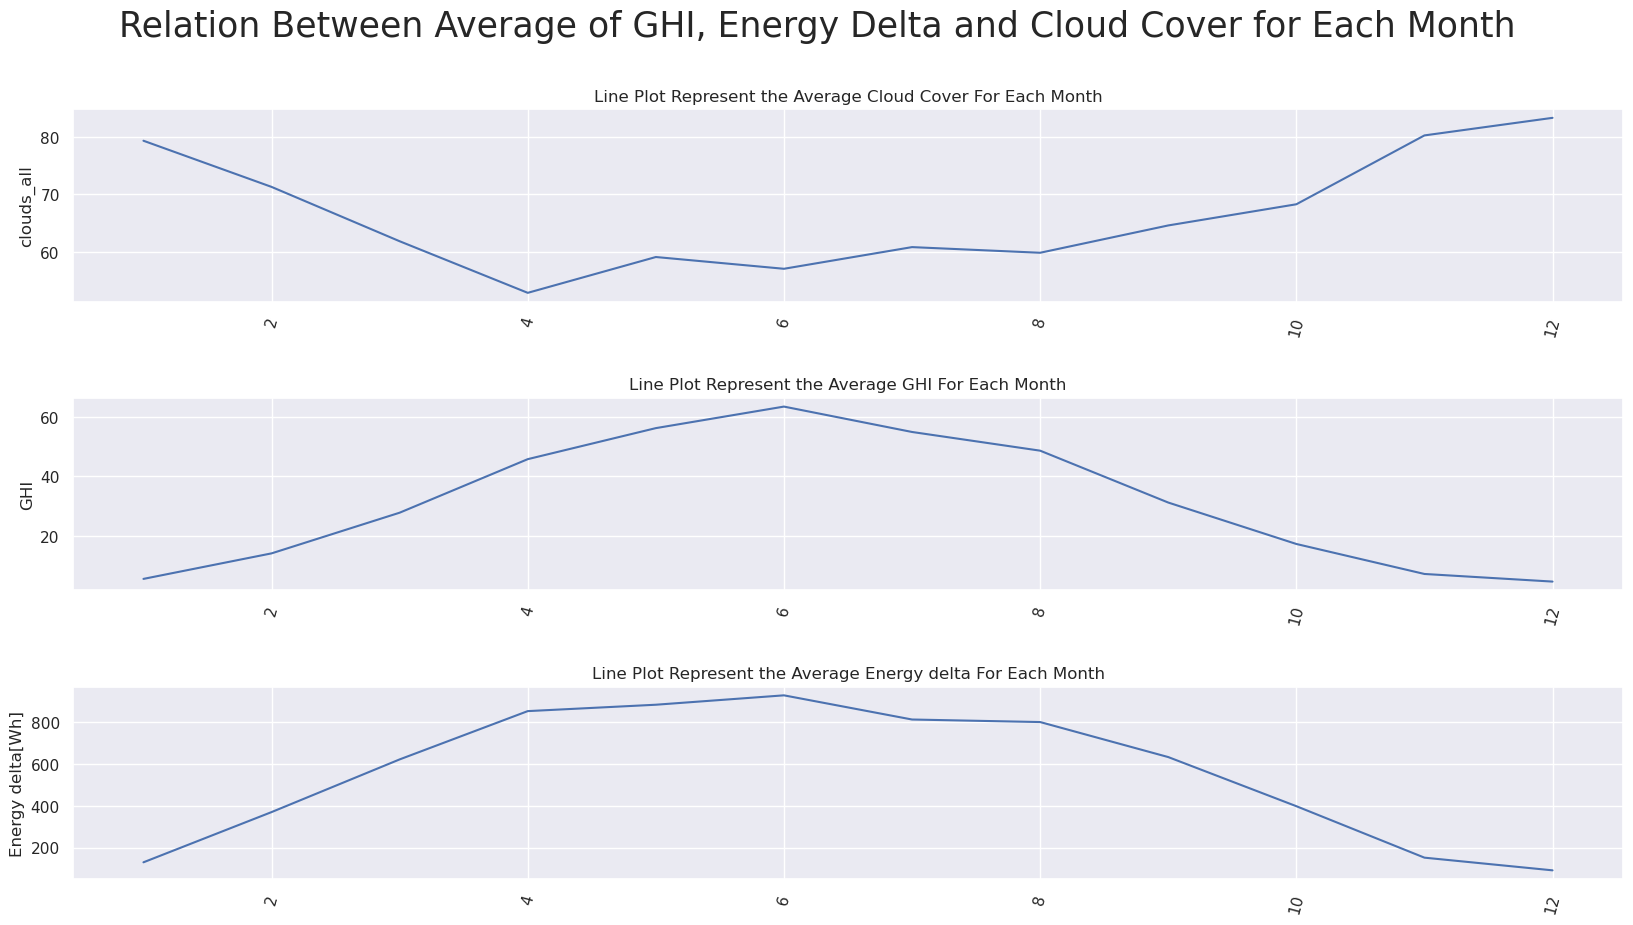

In [ ]:
figure, ax = plt.subplots(3,1,figsize = (20,10))
plt.subplots_adjust(hspace=0.5)
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['clouds_all'], ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['GHI'], ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[2])
ax[2].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between Average of GHI, Energy Delta and Cloud Cover for Each Month ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the Average Cloud Cover For Each Month')
ax[1].title.set_text('Line Plot Represent the Average GHI For Each Month')
ax[2].title.set_text('Line Plot Represent the Average Energy delta For Each Month')
plt.show()

# Wind Energy

TypeError: agg function failed [how->mean,dtype->object]

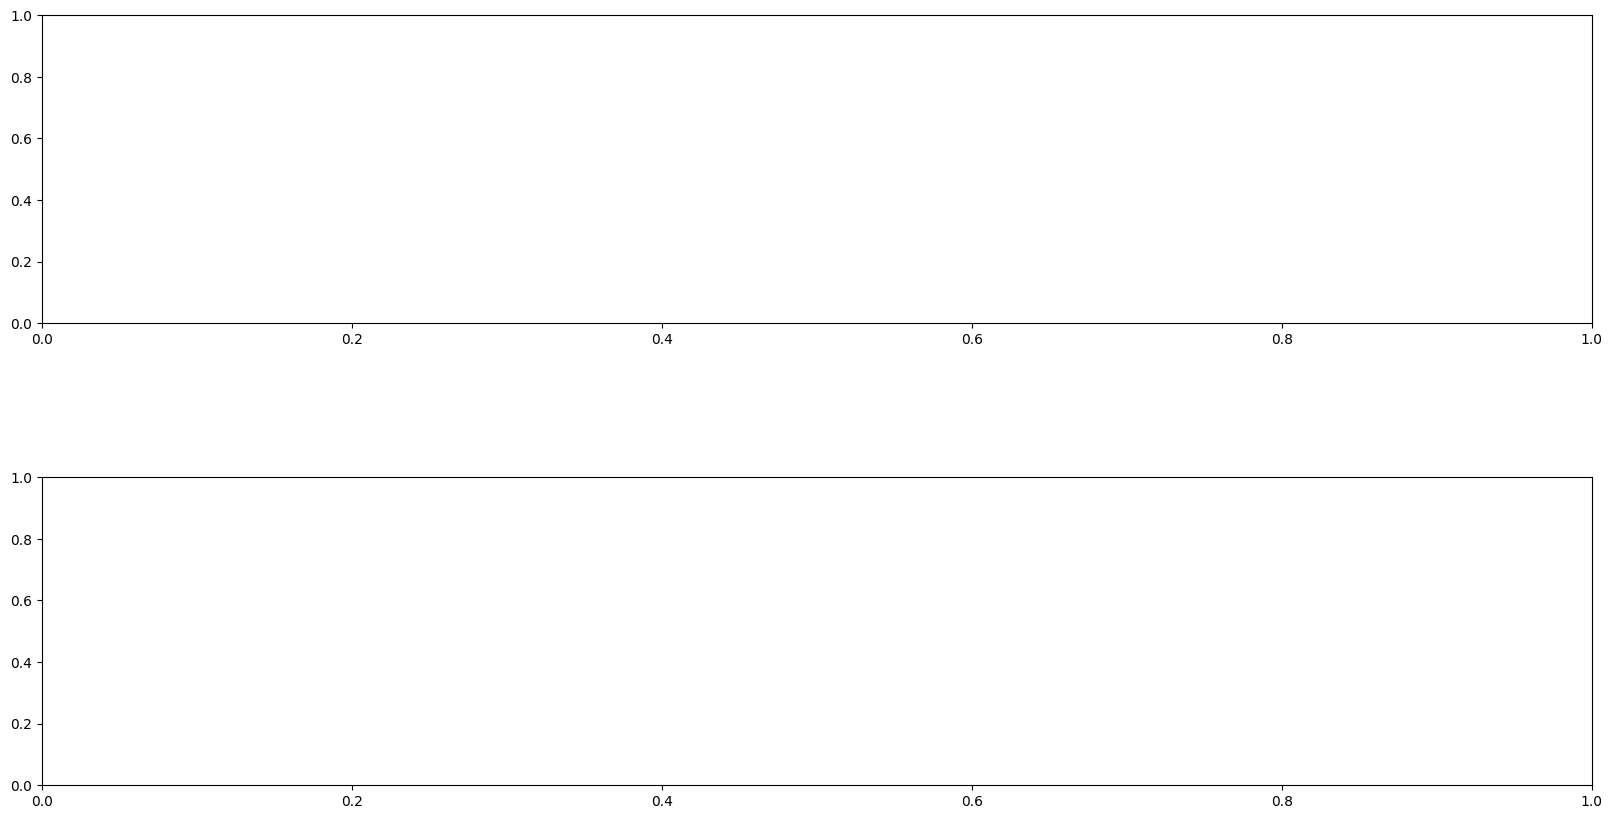

In [302]:
figure, ax = plt.subplots(2,1,figsize = (20,10))
plt.subplots_adjust(hspace=0.5)
sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['wind_speed'], ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(x=df['Hour'].unique(), y=df.groupby('Hour').mean()['Energy delta[Wh]'], ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between Average of Wind Speed and Energy Delta for Each Hour ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the Average Wind Speed for Each Hour')
ax[1].title.set_text('Line Plot Represent the Average Energy Delta for Each Hour')
plt.show()

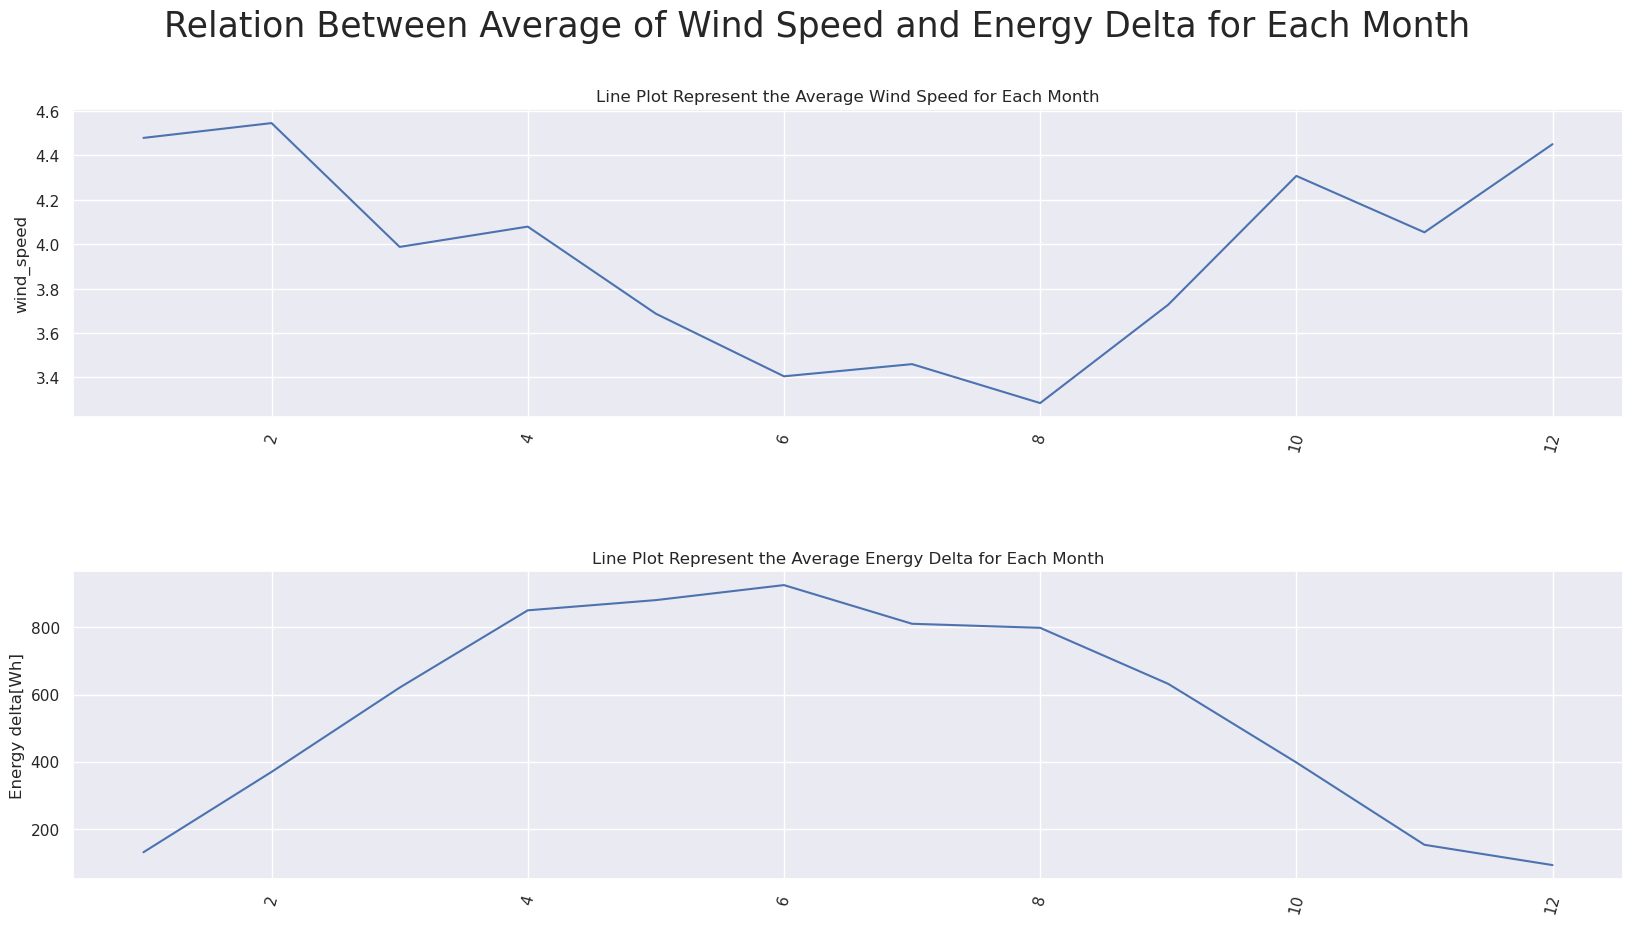

In [ ]:
figure, ax = plt.subplots(2,1,figsize = (20,10))
plt.subplots_adjust(hspace=0.5)
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['wind_speed'], ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['Energy delta[Wh]'], ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between Average of Wind Speed and Energy Delta for Each Month ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the Average Wind Speed for Each Month')
ax[1].title.set_text('Line Plot Represent the Average Energy Delta for Each Month')
plt.show()

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              196776 non-null  datetime64[ns]
 1   Energy delta[Wh]  196776 non-null  int64         
 2   GHI               196776 non-null  float64       
 3   temp              196776 non-null  float64       
 4   pressure          196776 non-null  int64         
 5   humidity          196776 non-null  int64         
 6   wind_speed        196776 non-null  float64       
 7   rain_1h           196776 non-null  float64       
 8   snow_1h           196776 non-null  float64       
 9   clouds_all        196776 non-null  int64         
 10  isDayTime         196776 non-null  int32         
 11  Month             196776 non-null  object        
 12  Hour              196776 non-null  int32         
 13  Week              196776 non-null  UInt32        
 14  Seas

# Humidity

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

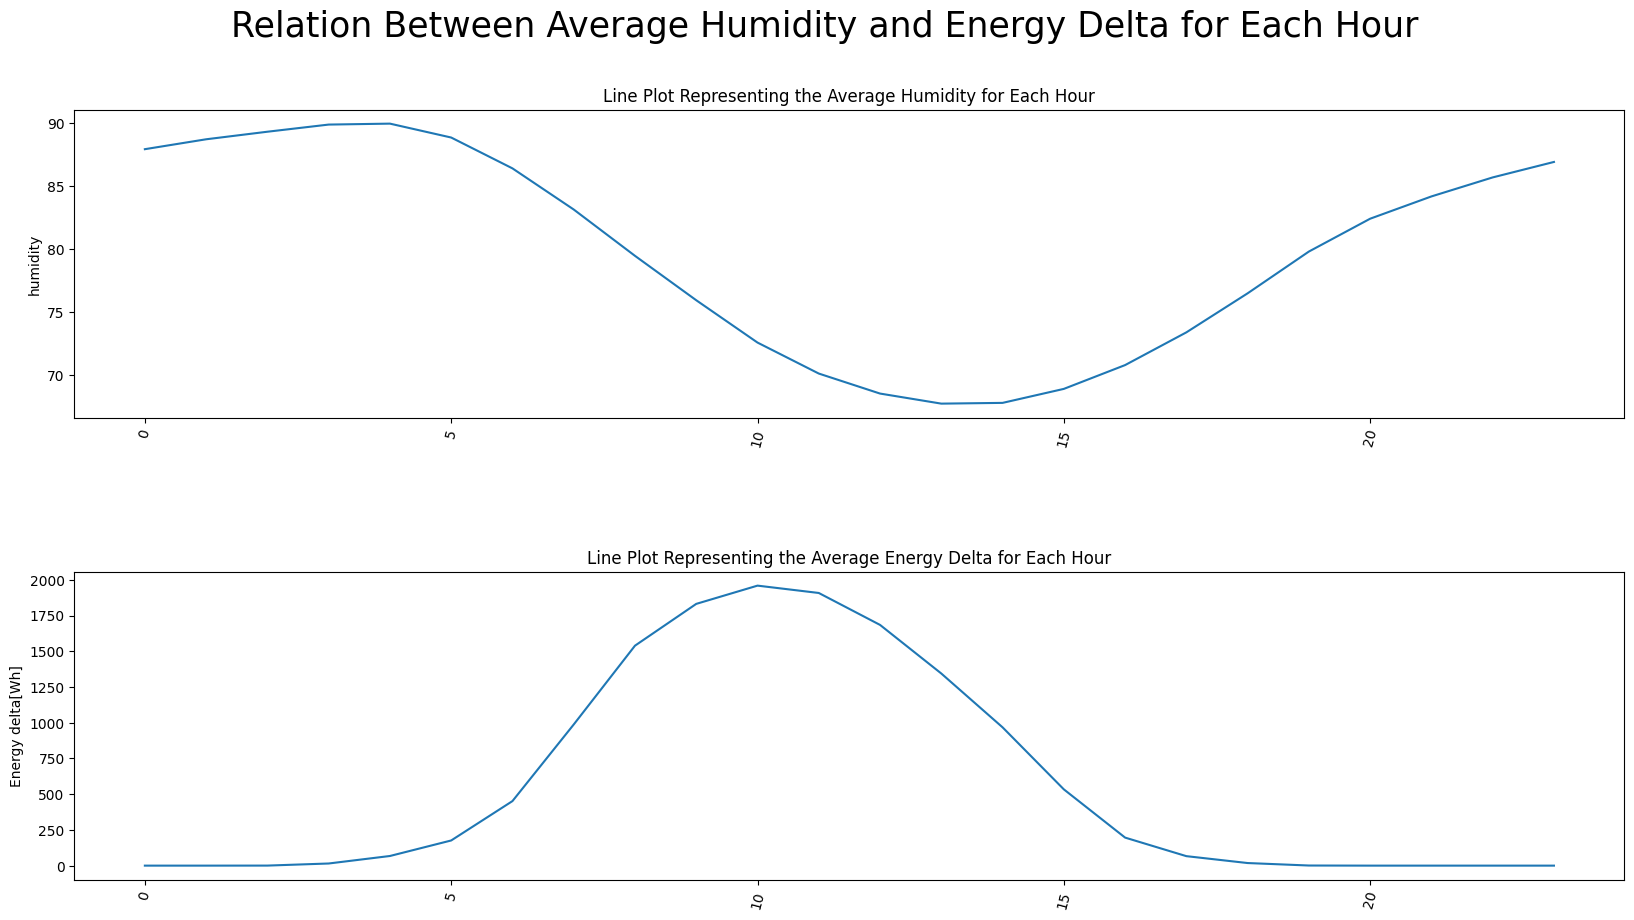

In [300]:

# Plot line graphs for hourly trends
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

# Line plot for average humidity by hour
sns.lineplot(x=df['Hour'].unique(), 
             y=df.groupby('Hour')['humidity'].mean(), ax=ax[0])
ax[0].tick_params('x', labelrotation=75)
ax[0].title.set_text('Line Plot Representing the Average Humidity for Each Hour')

# Line plot for average Energy delta[Wh] by hour
sns.lineplot(x=df['Hour'].unique(), 
             y=df.groupby('Hour')['Energy delta[Wh]'].mean(), ax=ax[1])
ax[1].tick_params('x', labelrotation=75)
ax[1].title.set_text('Line Plot Representing the Average Energy Delta for Each Hour')

# Overall title
fig.suptitle('Relation Between Average Humidity and Energy Delta for Each Hour', fontsize=25)

plt.show()


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

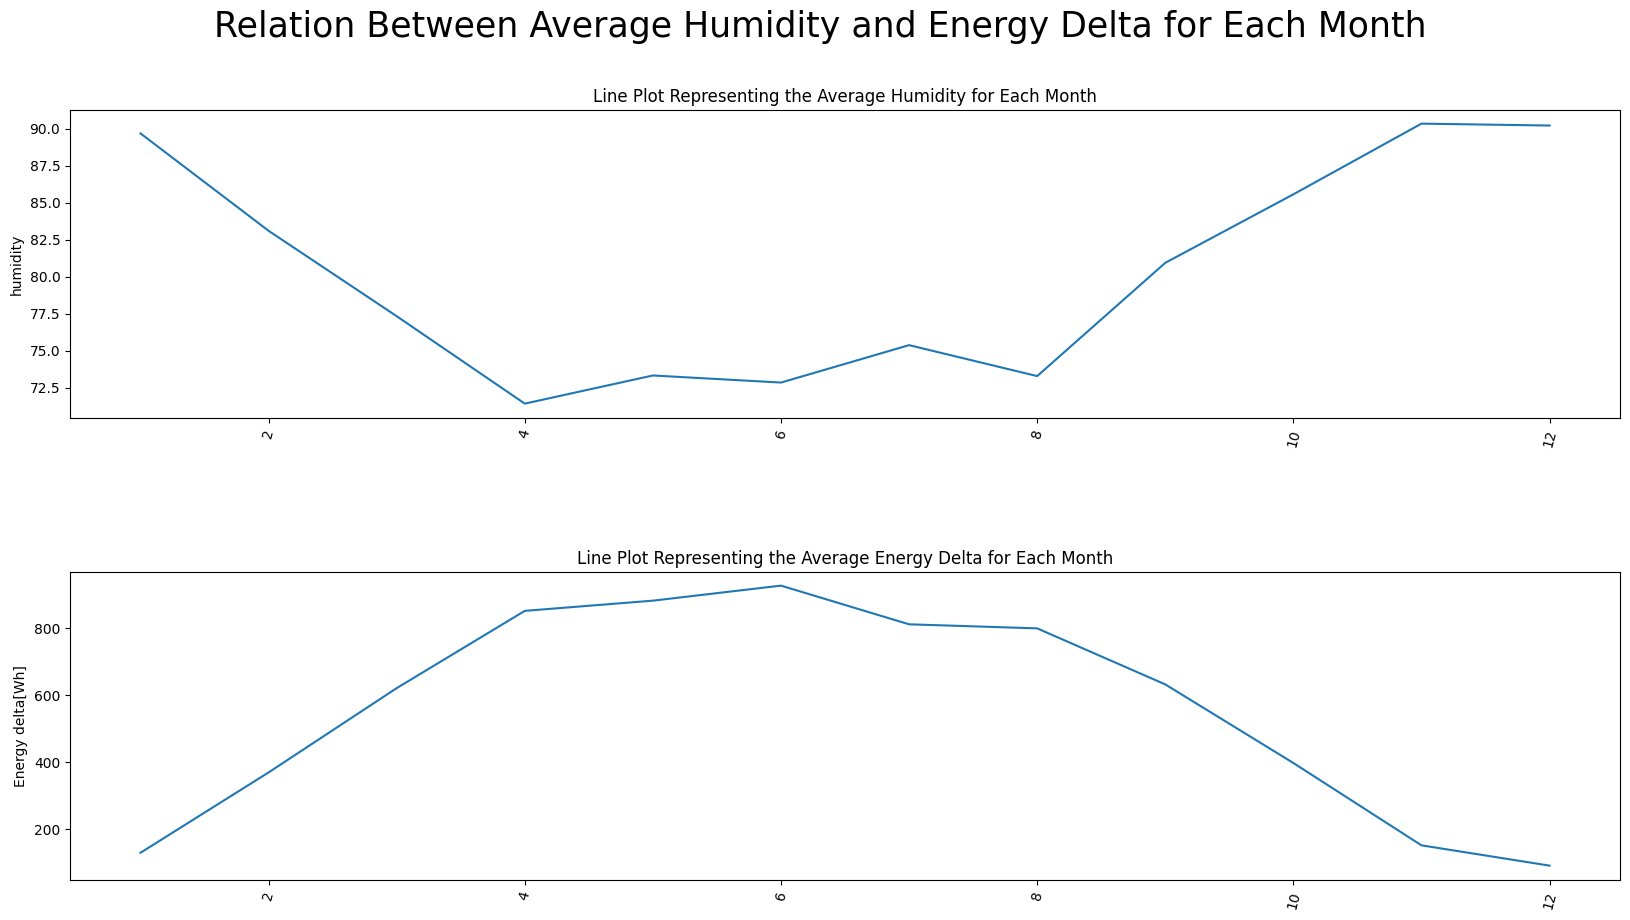

In [301]:
# Generate line plots for monthly averages of humidity and Energy delta[Wh]

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

# Line plot for average humidity by month
sns.lineplot(x=processed_df['Month'].unique(), 
             y=processed_df.groupby('Month').mean()['humidity'], ax=ax[0])
ax[0].tick_params('x', labelrotation=75)
ax[0].title.set_text('Line Plot Representing the Average Humidity for Each Month')

# Line plot for average Energy delta[Wh] by month
sns.lineplot(x=processed_df['Month'].unique(), 
             y=processed_df.groupby('Month').mean()['Energy delta[Wh]'], ax=ax[1])
ax[1].tick_params('x', labelrotation=75)
ax[1].title.set_text('Line Plot Representing the Average Energy Delta for Each Month')

# Overall title for the plots
fig.suptitle('Relation Between Average Humidity and Energy Delta for Each Month', fontsize=25)

plt.show()


# CONCLUSION

1. Solar energy is the best option for this geographical area where they can fulfil their energy need as there hardly any snowfall or cloud coverage when the energy delta is in peak.
2. In thatt same duretion the GHI is also in peak.
3. It is noticed that there is a continuous decrease in rainfall so It is not viable to relay on it, as the huge capital investmentis required for the construction of hydro power projects.
4. It is also noticed that the average wind speed is less than 5 m/s in this condition a wind mill is not economical further more the wind speed is very low in those month when there is a surge in energy demand.
5. In the case of solar energy the GHI is in its maximum when the energy demand is more.
6. From all the observetion it is evident that solar energy is the best option for that region.

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

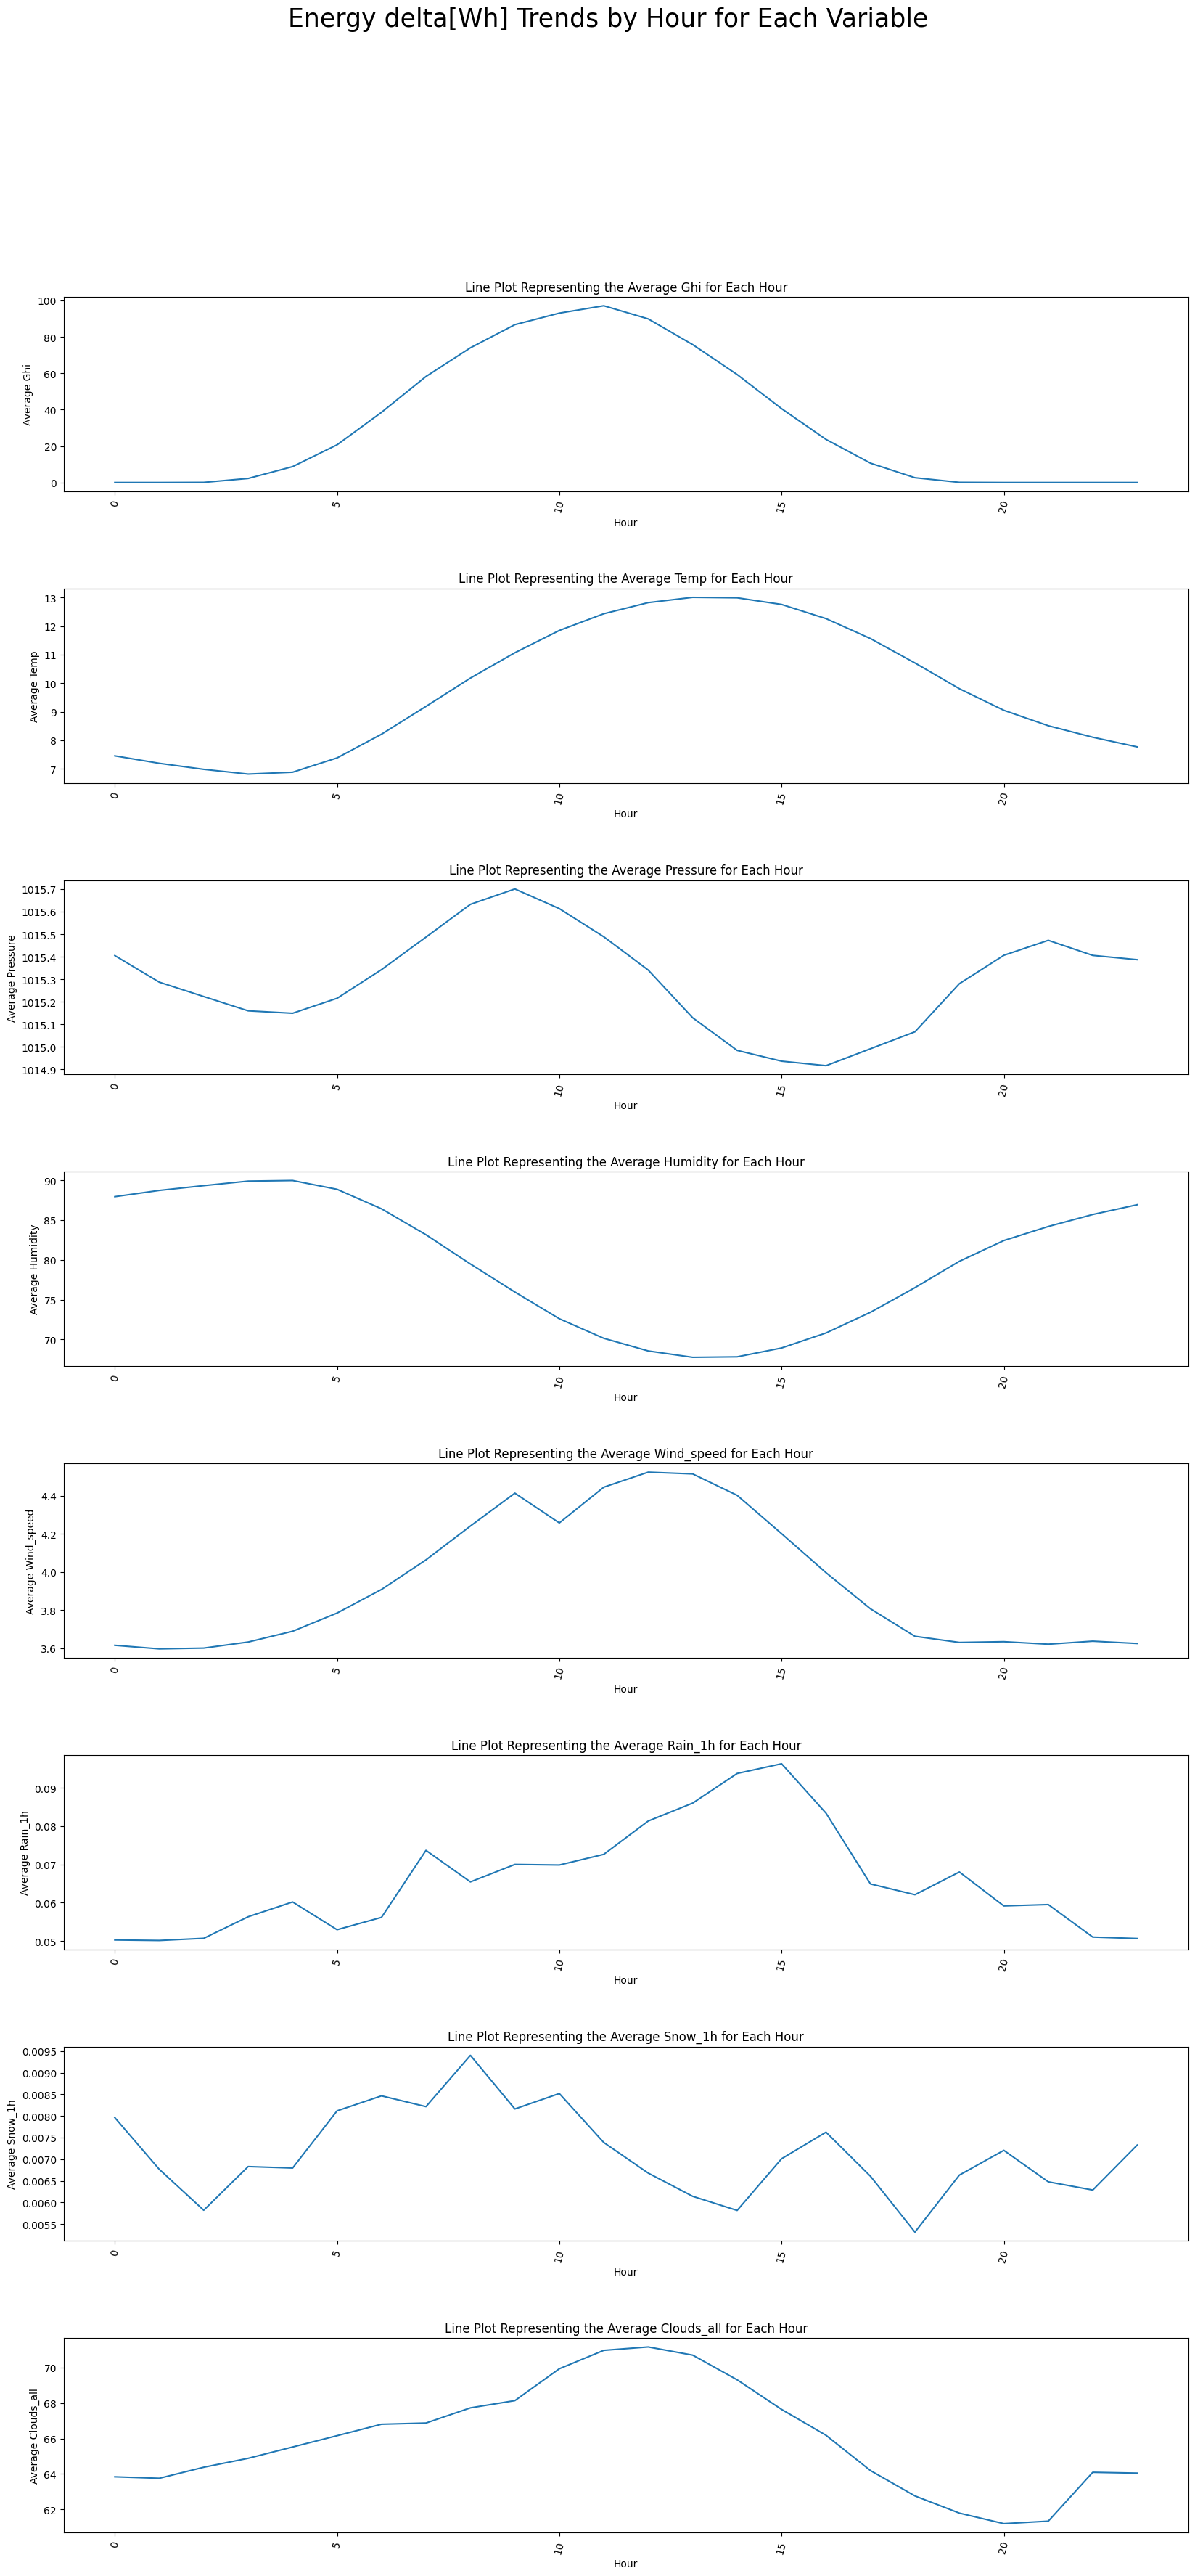

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

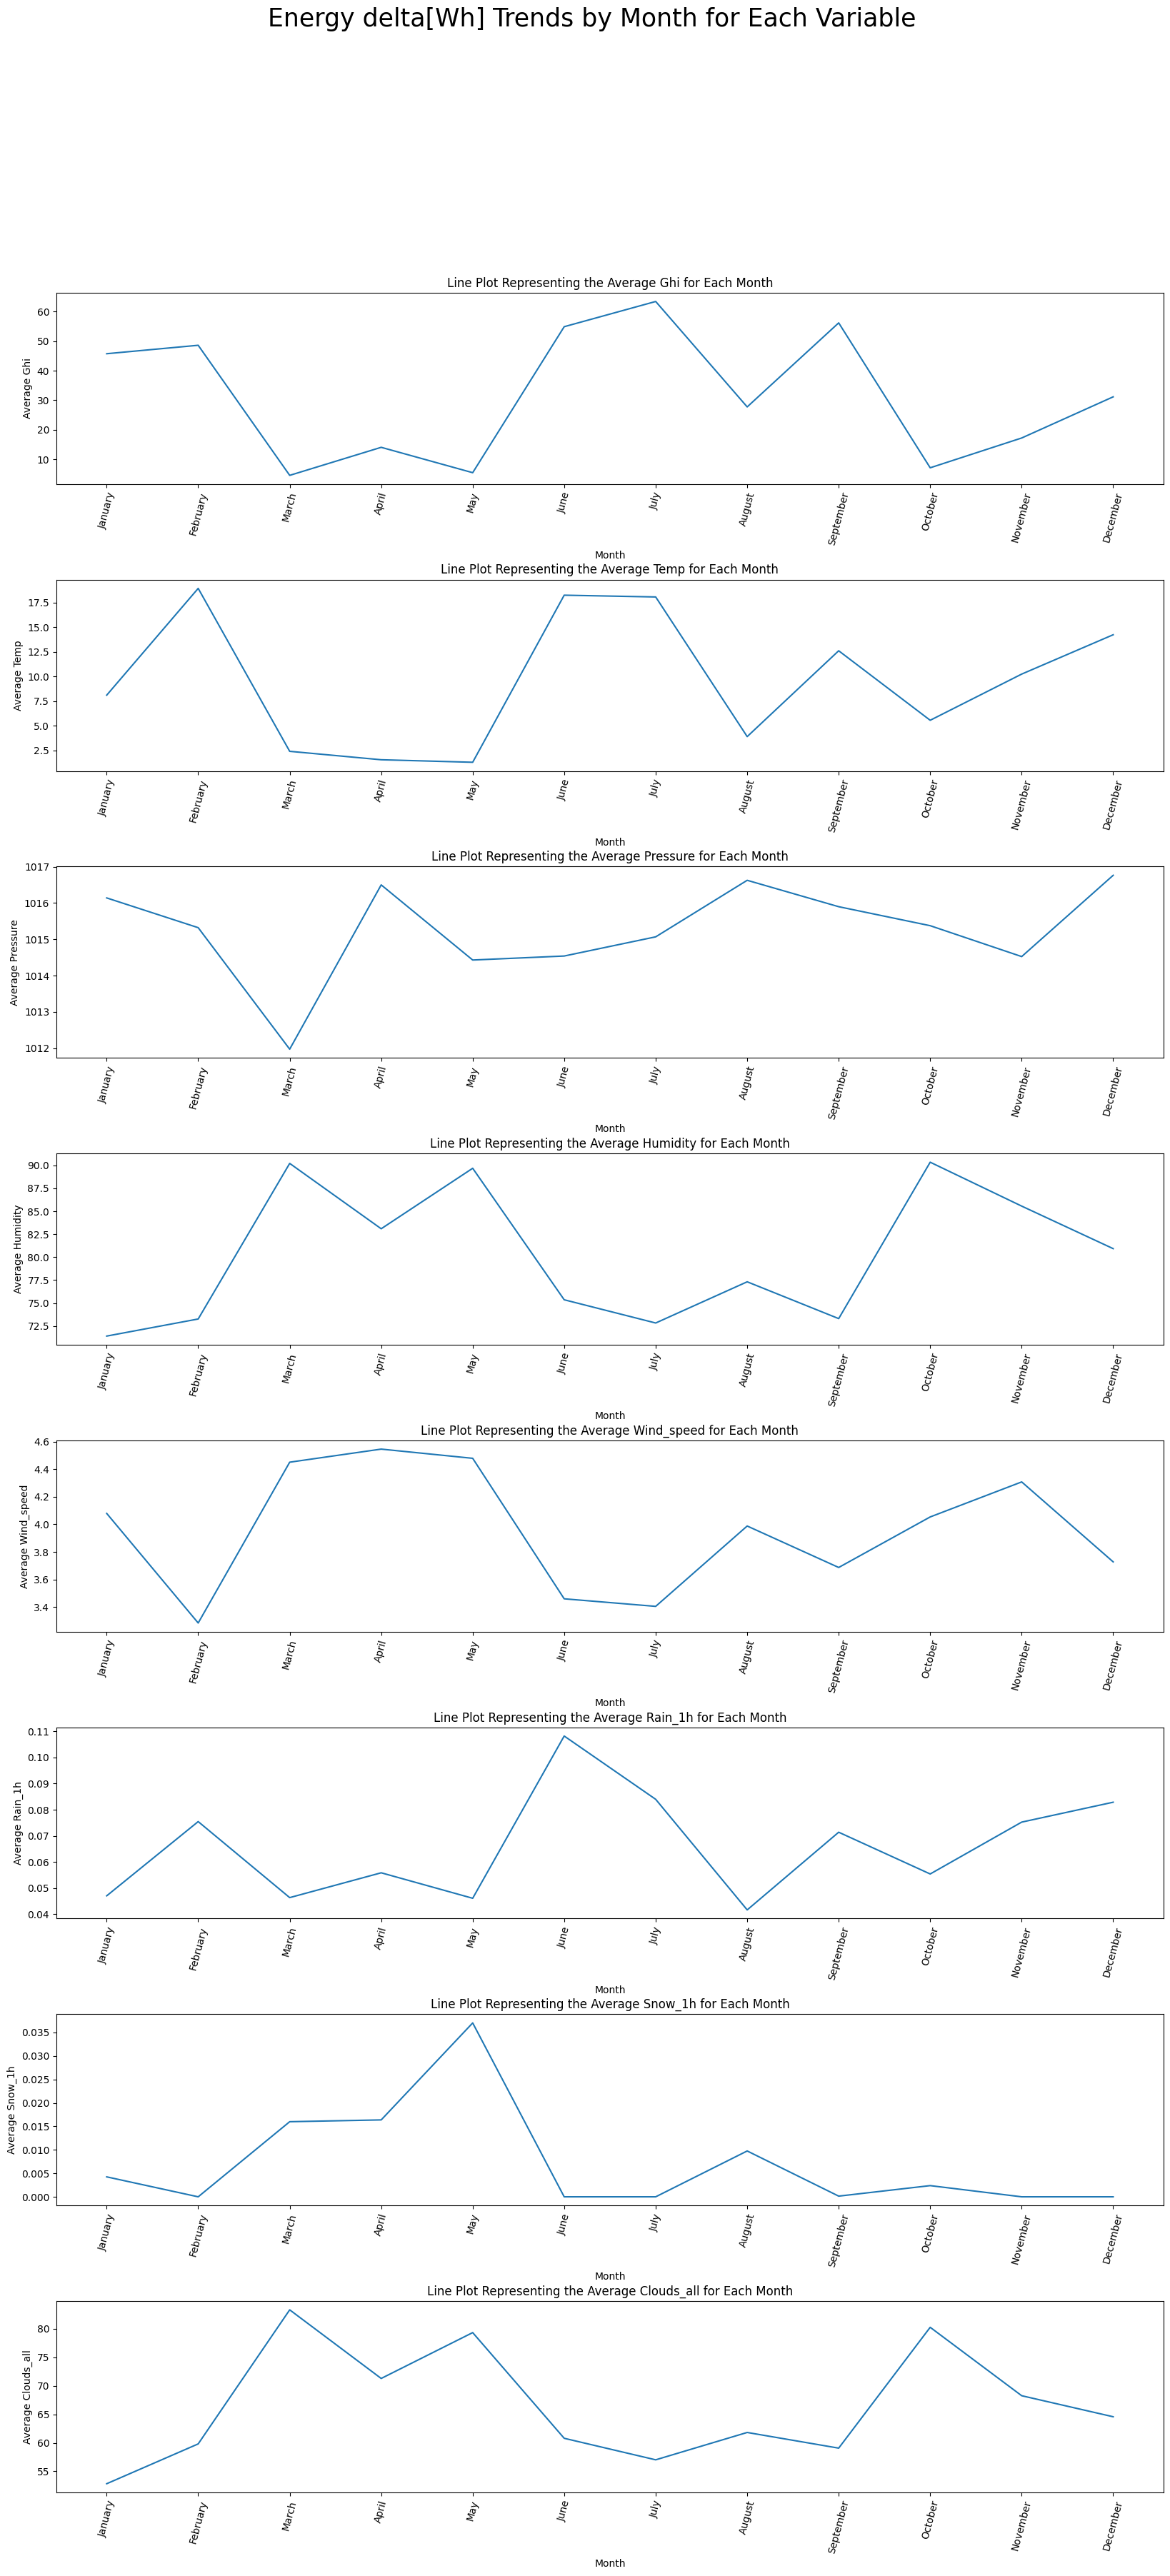

In [ ]:
# Define a function to generate line plots for Energy delta[Wh] against one variable per graph
def plot_energy_trends_separately(df, group_by, variables, suptitle):
    fig, ax = plt.subplots(len(variables), 1, figsize=(20, 5 * len(variables)))
    plt.subplots_adjust(hspace=0.5)
    
    # Ensure the subplot object is iterable for a single variable
    if len(variables) == 1:
        ax = [ax]
    
    for i, variable in enumerate(variables):
        sns.lineplot(x=df[group_by].unique(), 
                     y=df.groupby(group_by)[variable].mean(), ax=ax[i])
        ax[i].tick_params('x', labelrotation=75)
        ax[i].title.set_text(f'Line Plot Representing the Average {variable.capitalize()} for Each {group_by.capitalize()}')
        ax[i].set_xlabel(group_by.capitalize())
        ax[i].set_ylabel(f'Average {variable.capitalize()}')
    
    # Set the overall title
    fig.suptitle(suptitle, fontsize=25)
    plt.show()


# Variables to compare with Energy delta[Wh]
variables_to_compare = ['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all']

# Generate separate plots grouped by Hour
plot_energy_trends_separately(
    df=df, 
    group_by='Hour', 
    variables=variables_to_compare, 
    suptitle='Energy delta[Wh] Trends by Hour for Each Variable'
)

# Generate separate plots grouped by Month
plot_energy_trends_separately(
    df=df, 
    group_by='Month', 
    variables=variables_to_compare, 
    suptitle='Energy delta[Wh] Trends by Month for Each Variable'
)
